# The ```numpy.random``` Package
***

### Table of contents

#### 1. Purpose of the package

#### 2. Simple random data functions
   
- 2.1 integers()
- 2.2 random()
- 2.3 choice()
- 2.4 bytes()
   
#### 3. Permutations functions
  
- 3.1 shuffle()
- 3.2 permutation()
   
#### 4. Distributions functions
  
- 4.1 chisquare()
- 4.2 exponential()
- 4.3 geometric()
- 4.4 normal()
- 4.5 rayleigh()
- 4.6 standard_t()
- 4.7 triangular()
- 4.8 uniform()

#### 5. Seeds

#### 6. References


### 1. Purpose of the package
***
NumPy is a high-performance multidimensional array library and is the core library for scientific computing in Python. A NumPy array is a grid of values of the same type, and is indexed by a tuple of non-negative integers. The standard Python library provides lists, which is the Python equivalent of a NumPy array, but is resizeable and can contain elements of different types. NumPy data structures perform better in terms of size, performance and functionality.<sup>1</sup> Although Python has an in-built ```random``` package, ```numpy.random``` is a subpackage of NumPy that offers a suite of extra functionality and methods based on pseudorandom number generation.<sup>2</sup> It contains some simple random data generation methods, permutation and distribution functions, and random generator functions.

Here are some key points about NumPy's ```ndarray``` objects relevant to the ```numpy.random``` module:
- The data in an ```ndarray``` must be homogeneous
- Arrays have a ```ndim``` attribute for the number of axes or dimensions of the array
- Arrays have a ```shape``` attribute which is a tuple that indicates the size of the array in each dimension
- Arrays have a ```dtype``` attribute which describes the data type of the array
- The ```size``` attribute is the total number of elements in the array

![NumPy Array](arrays.png)

A random number does not mean generating a different number each time, but rather something that cannot be logically predicted. If there is a computer programme that can generate a random number, it can be predicted, and therefore it is not truly random. Random numbers generated using an algorithm are referred to as "pseudorandom numbers".<sup>3</sup> Pseudorandomness is a sample of numbers that appear to be randomly generated, but were in fact generated using a deterministic process. They are generated in a sequence that is seeded with an initial number. Although the value of this seed is not important, what is important to note is that the same seeding of the process will result in the same sequence of random numbers.<sup>4</sup> An explanation of the use of seeds in generating pseudorandom numbers will be given in section 5.

The first step in analysing this package is to import the NumPy library as well as other required libraries.

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math as m

The code below shows how a new Generator is constructed. ```numpy.random.default_nrg()``` is the recommended constructor, which takes one parameter to create a seed to initialise the BitGenerator. In this particular example, the seed is set to 123. If no seed is passed, then fresh, unpredictable entropy will be pulled from the OS.<sup>5</sup> This infers that the seed will be based on the current time. The seed will be different each time the programme is run and consequently the sequence of random numbers will also be different with each run. The default BitGenerator used by Generator is PCG64, which will be discussed in more detail in section 5.

In [2]:
# Construct a new Generator
rng = np.random.default_rng(123)
print(rng)

Generator(PCG64)


The following sections will explain the use of the "Simple random data" and "Permutations" functions, explain the use and purpose of eight "Distributions" functions, and explain the use of seeds in generating pseudorandom numbers.

<br>

### 2. Simple random data functions
***
The simple random data functions are a set of functions that return different types of random numbers depending on the required outputs. There are four simple random data functions in the ```numpy.random``` package. These are:

1. ```integers()```
2. ```random()```
3. ```choice()```
4. ```bytes()```

#### 2.1. integers(low[, high, size, dtype, endpoint])

This function returns random integers from *low* (inclusive) to *high* (exclusive), or if ```endpoint=True```, *low* (inclusive) to *high* (inclusive). This replaces the ```RandomState.randint()``` and ```RandomState.random_integers()``` functions in the previous version of the API documentation.<sup>6</sup> The function below returns an array comprising 15 intergers between 2 and 12. By setting ```endpoint=True```, the default setting is overwritten and the number 12 is now inclusive in the output.

In [3]:
# Construct a new Generator
rng = np.random.default_rng()
# Create an array of random integers
rng.integers(2, 12, size=15, endpoint=True)

array([ 4,  5,  3,  9,  3, 10,  9, 10, 11,  5,  2,  5,  8,  4,  2],
      dtype=int64)

If no value is given for *high*, this results in an array ranging from 0 to the *low* value, as shown below. In this instance, ```endpoint=False``` is the default, therefore the *low* value of five is excluded.

In [4]:
# Construct a new Generator
rng = np.random.default_rng()
# Create an array of random integers
rng.integers(5, size=15)

array([1, 4, 3, 2, 4, 1, 0, 2, 0, 0, 2, 1, 3, 3, 0], dtype=int64)

A tuple of integers can also be passed to the *size* parameter. In the example below, an array of size 50 x 20 x 40 is returned. As ```endpoint=True```, the *low* value is included. The results are from the "discrete uniform" distribution, which is also known as the "equally likely outcomes" distribution.<sup>7</sup>

In [5]:
# Construct a new Generator
rng = np.random.default_rng()
# Create three arrays of integers
ax = rng.integers(30, size=(50,20,40), endpoint=True)
ay = rng.integers(40, size=(50,20,40), endpoint=True)
az = rng.integers(50, size=(50,20,40), endpoint=True)
# Print the first array
print(ax)

[[[23 17  9 ... 18 18 30]
  [ 9 13 25 ... 13 21 27]
  [10 21 25 ...  1 30 18]
  ...
  [26 25  8 ...  4 18 21]
  [14  6 26 ... 20 30 26]
  [ 8  5  9 ... 19 22 23]]

 [[23 18 29 ... 16 13 18]
  [ 7  1 15 ... 28 20 26]
  [ 6 28 28 ... 29  6 25]
  ...
  [14 16 30 ... 19  8 11]
  [ 8 28 25 ... 12 25  5]
  [ 6 18 10 ... 24 27 22]]

 [[28  8  0 ... 16  0 27]
  [25 25 28 ...  1 23  8]
  [30 15 21 ... 13  7 10]
  ...
  [12 13 15 ... 28  0 20]
  [17 25 21 ...  2  0  5]
  [11  7  2 ... 29  1  8]]

 ...

 [[ 9 11 29 ... 24  4 24]
  [26 16 24 ...  7 10 20]
  [29 12 30 ... 24  5  5]
  ...
  [30 26 28 ...  8 16 20]
  [10  5 28 ... 27 28  4]
  [19 13 11 ...  8  5  6]]

 [[18 19  7 ... 22 19 22]
  [ 8 13  2 ... 20  2  6]
  [ 5 24  0 ...  9 30  7]
  ...
  [14  2 27 ... 27 30 19]
  [15 16 19 ... 23 19  3]
  [ 7  1 19 ...  0 28 19]]

 [[ 1  4 21 ...  7 12 15]
  [10  2 30 ...  9 14 30]
  [27  3  2 ... 12 22  5]
  ...
  [ 7 19 14 ... 14  6 15]
  [27  2 27 ...  0 17 29]
  [14 20 17 ... 15 21 20]]]


It is clear from the two plots below that the probability density is approximately equal for each integer in each array. One observation that can be made here is that that the peak of the curve is flatter as the *low* value increases.

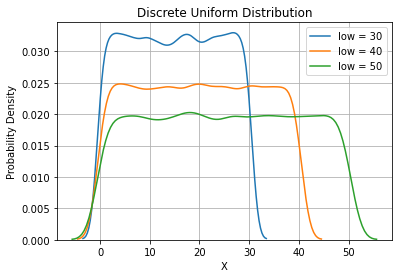

In [6]:
# Create a plot of each array, but exclude histogram
sns.distplot(ax, label="low = 30", hist=False)
sns.distplot(ay, label="low = 40", hist=False)
sns.distplot(az, label="low = 50", hist=False)
plt.xlabel("X"), plt.ylabel("Probability Density"), plt.title("Discrete Uniform Distribution")
plt.grid()

The mean of each array is approximately half of what the passed *low* value for each array is.

In [7]:
# Get the mean of each array
print(np.mean(ax))
print(np.mean(ay))
print(np.mean(az))

15.003825
19.9836
25.01165


The histogram below also illustrates how the returned random integers are from the discrete uniform distribution. Each value of the random variable is equally likely, and the values of the random variable are uniformly distributed.<sup>8</sup> The uniform distribution is discussed in more detail in section 4.8.

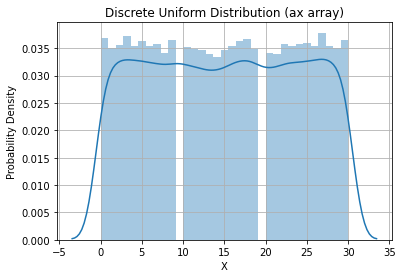

In [8]:
# Plot a histogram of the ax array
sns.distplot(ax)
plt.xlabel("X"), plt.ylabel("Probability Density"), plt.title("Discrete Uniform Distribution (ax array)")
plt.grid()

#### 2.2 random([size, dtype, out])

This function returns random floats in the half-open interval [0.0, 1.0). A half-open (or half-closed) interval is an interval in which one endpoint is included, but not the other. It is denoted [a, b) or (a, b].<sup>9</sup> <sup>10</sup> In this instance, $0.0≤x<1.0$. The function below returns a 3 x 4 x 5 array of floats between 0.0 (inclusive) and 1.0 (exclusive).

In [9]:
# Construct a new Generator
rng = np.random.default_rng()
# Create an array of random floats
rng.random((3, 4, 5))

array([[[0.19099503, 0.09563577, 0.87002979, 0.5098403 , 0.04721361],
        [0.49959038, 0.31085125, 0.49892395, 0.68222973, 0.91510226],
        [0.17672542, 0.72799122, 0.30240884, 0.55248124, 0.73577685],
        [0.79335468, 0.90569717, 0.88650094, 0.71530384, 0.74243638]],

       [[0.60656823, 0.67122541, 0.96381744, 0.77306805, 0.8783763 ],
        [0.43933236, 0.17909812, 0.04883176, 0.38043555, 0.9319562 ],
        [0.09896408, 0.05466403, 0.55017118, 0.49000087, 0.62769571],
        [0.22853905, 0.47908532, 0.68482961, 0.98699819, 0.84581813]],

       [[0.59054596, 0.88741424, 0.37265217, 0.57704743, 0.2695901 ],
        [0.82428984, 0.72545493, 0.92090803, 0.81378365, 0.12587427],
        [0.89523095, 0.63959432, 0.53452144, 0.65245901, 0.83351935],
        [0.27878557, 0.5757479 , 0.66343944, 0.92312487, 0.92547926]]])

The function below returns an array of 500 floats between 0.0 and 1.0. Results are from the "continuous uniform" distribution over the stated interval, and therefore the mean of these numbers is approximpately 0.5.<sup>11</sup>

In [10]:
# Construct a new Generator
rng = np.random.default_rng()
# Create an array of random floats
b = rng.random(1000)
# Print the array
print(b)

[8.45832198e-01 4.04359333e-01 8.55645051e-01 7.97140462e-01
 2.77025493e-01 9.77375867e-01 6.97215981e-01 8.68156522e-01
 1.38540270e-01 8.77630480e-01 1.05333465e-01 7.57367443e-01
 1.21754704e-01 6.74495340e-01 1.73981353e-01 2.59813137e-01
 4.72789598e-01 7.11653574e-01 6.38105106e-01 6.60220803e-02
 1.58653507e-01 4.76590611e-01 6.12044660e-02 2.91348937e-01
 1.73045758e-01 8.24078257e-01 5.59112567e-01 8.99811505e-01
 4.02458676e-01 8.85293935e-01 2.02214884e-01 1.98114012e-01
 2.24872825e-01 1.53029039e-01 5.49702514e-01 6.13142509e-01
 1.53396773e-03 7.38760884e-01 3.30398227e-01 6.14053501e-02
 5.71481146e-01 1.53943984e-01 5.32035090e-01 1.71700485e-01
 9.93911116e-01 9.36918744e-01 2.43609817e-01 6.53271526e-01
 7.63161717e-01 5.70853164e-01 2.69209039e-01 6.68980997e-01
 1.23537545e-01 2.56023889e-01 8.00283035e-01 3.93104402e-01
 2.69351079e-01 3.73781336e-01 8.36021272e-01 5.93754680e-01
 7.20506750e-01 4.17561754e-01 5.04292695e-01 1.01156946e-01
 6.28548364e-01 3.240500

The scatter plot below shows the random distribution of this array.

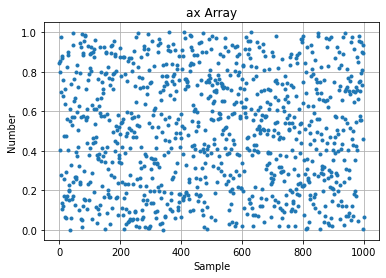

In [11]:
# Create a scatter plot of the array
plt.plot(b, ".")
plt.title("ax Array"), plt.xlabel("Sample"), plt.ylabel("Number")
plt.grid()

The ```describe()``` function can be used to get the mean of the array, which is approximately 0.5, as well as other statistics.<sup>12</sup>

In [12]:
# Generate descriptive statistics
df = pd.DataFrame(b)
df.describe()

,0
count,1000.000000
mean,0.498252
std,0.287376
min,0.000023
25%,0.242423
50%,0.505427
75%,0.747126
max,0.999309


In [13]:
# Get the mean of the array
np.mean(b)

0.4982522698489123

As per the plot below, the probability density function is portrayed almost as a rectangle, as the probability density is approximately 1.0 for each bin.<sup>13</sup>

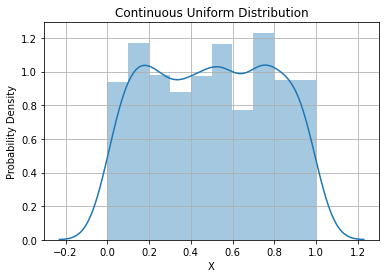

In [14]:
# Create a plot of the array
sns.distplot(b)
plt.xlabel("X")
plt.ylabel("Probability Density")
plt.title("Continuous Uniform Distribution")
plt.grid()

#### 2.3. choice(a[, size, replace, p, axis, shuffle])

This function generates a random sample from a given 1-D array.<sup>14</sup> The function below returns an array comprising four intergers between 1 and 10 (exclusive). If an integer is given, a random integer is returned from ```numpy.arange(a)```.

In [15]:
# Construct a new Generator
rng = np.random.default_rng()
# Create an array of integers between 1 and 10 (exclusive)
rng.choice(10, 4)

array([8, 4, 0, 3], dtype=int64)

The example below returns a value between 0 (inclusive) and 10 (exclusive) as values are generated within the half open interval [start, stop).<sup>15</sup>

In [16]:
# Construct a new Generator
rng = np.random.default_rng()
# Return a value between 0 and 10 (exclusive)
rng.choice(10)

9

As demonstrated below, the function can be used as a simulator for a simple coin flip.

In [17]:
# Construct a new Generator
rng = np.random.default_rng()
# Return a random string
rng.choice(["Heads", "Tails"])

'Tails'

The function can also be used to select a random item from a list as shown below.<sup>16</sup>

In [18]:
# Construct a new Generator
rng = np.random.default_rng()
# Create a list
number_list = [111, 222, 333, 444, 555]
# Output a random value from the list
print(rng.choice(number_list))

333


A tuple of integers can also be passed to the *size* parameter. In the example below, an array of size 3 x 2 x 3 is returned. The values are between 0 (inclusive) and 18 (exclusive). By setting ```replace=False```, no integer is repeated in the output. An error would occur if the input was less than 18 in this case, as there would not be enough unique integers.<sup>17</sup>

In [19]:
# Construct a new Generator
rng = np.random.default_rng()
# Create an array of unique values
c = rng.choice(18, size=[3, 2, 3], replace=False)
print(c)

[[[ 2  7  6]
  [10 14  0]]

 [[ 8 13  1]
  [ 9  4 11]]

 [[15 16  5]
  [17 12  3]]]


#### 2.4. bytes(length)

This function returns random bytes as a string.<sup>18</sup> The function below returns five bytes.

In [20]:
# Construct a new Generator
rng = np.random.default_rng()
# Return five random bytes
rng.bytes(5)

b'\xdff\xeb\x11!'

The example below outputs 10 rows of bytes increasing in length by one byte with each iteration.<sup>19</sup> A byte object is displayed as a sequence of bytes between quotes and preceded by "b".

In [21]:
# Construct a new Generator
rng = np.random.default_rng()
# Output a string of bytes, incrementing by 1 each time
for length in range(10):
    print(length, ": ", rng.bytes(length))

0 :  b''
1 :  b'\x10'
2 :  b'K\xf2'
3 :  b';f\x87'
4 :  b'%\xa8.\x0f'
5 :  b'4\xafGl\xfe'
6 :  b'\xb05\x90\xd7\xe3\xc1'
7 :  b' 9\xdc\xd9\xd0\xa4\x92'
8 :  b'\x85\xa8\xadK4l\x9d\x1d'
9 :  b'u\xb1\xf4/\xaa\xdel\x0c\x8b'


<br>

### 3. Permutations functions
***
A permutation is an arrangement or ordering of a number of different objects. There are two permutation functions in the ```numpy.random``` package used for rearranging the elements of an array. These are:

1. ```shuffle()```
2. ```permutation()```

#### 3.1. shuffle(x[, axis])

This function modifies a sequence in-place by shuffling or re-arranging its contents.<sup>20</sup> The function below takes a list of sequential integers as input and reorganises the items.  

In [22]:
# Construct a new Generator
rng = np.random.default_rng()
# Create a list of integers
shuffle_lst = [1, 2, 3, 4, 5]
# Shuffle the values in the list
rng.shuffle(shuffle_lst)
# Print the shuffled list
print(shuffle_lst)

[5, 3, 4, 2, 1]


The function below returns an array of size 3 x 3 x 2 with values between 0.0 and 1.0. The subsequent code shuffles the order of the first axis only, while the order of the others remain unchanged.

In [23]:
# Construct a new Generator
rng = np.random.default_rng()
# Create an array of random floats
shuffle_array = rng.random((3, 3, 2))
# Print array
print(shuffle_array)

[[[0.96156154 0.79228939]
  [0.64205206 0.5359862 ]
  [0.29427188 0.36616082]]

 [[0.35024095 0.91621083]
  [0.95034358 0.15331847]
  [0.86905022 0.78329278]]

 [[0.32360666 0.17382745]
  [0.9236181  0.39360752]
  [0.15447152 0.56390829]]]


In [24]:
# Shuffle the array
rng.shuffle(shuffle_array)
# Print the shuffled array
print(shuffle_array)

[[[0.32360666 0.17382745]
  [0.9236181  0.39360752]
  [0.15447152 0.56390829]]

 [[0.35024095 0.91621083]
  [0.95034358 0.15331847]
  [0.86905022 0.78329278]]

 [[0.96156154 0.79228939]
  [0.64205206 0.5359862 ]
  [0.29427188 0.36616082]]]


As demonstrated below, strings can also be shuffled.

In [25]:
# Construct a new Generator
rng = np.random.default_rng()
# Create an array of random strings
str_array = np.array(["Ireland", "England", "Scotland", "Wales", "Northern Ireland"])
# Shuffle the array
rng.shuffle(str_array)
# Print the shuffled array
print(str_array)

['England' 'Scotland' 'Ireland' 'Wales' 'Northern Ireland']


#### 3.2. permutation(x[, axis])

This function randomly permutes a sequence, or returns a permuted range. The difference between this and the ```shuffle()``` function is that ```permutation()``` returns a re-arranged array while leaving the original array unchanged.<sup>21</sup>

In [26]:
# Construct a new Generator
rng = np.random.default_rng()
# Create an array
perm_array = [1, 2, 3, 4, 5]
# Print the permuted array
print("Permuted array: ", rng.permutation(perm_array))
# Print the original array
print("Original array: ", perm_array)

Permuted array:  [4 5 2 1 3]
Original array:  [1, 2, 3, 4, 5]


If passed an integer, the function will return a shuffled range as shown below.<sup>22</sup> An error would occur if ```shuffle()``` was used instead, as it requires a list or array as input.

In [27]:
# Output a shuffled array of values in the range 0-9
rng.permutation(10)

array([2, 6, 4, 1, 9, 8, 7, 0, 3, 5])

<br>

### 4. Distributions functions
***
![Distributional Choices](distributional_choices.png)

As illustrated in the image above, there are various shapes, models and classifications of probability distributions classified into two distinct categories: discrete and continuous. If a variable can take on any value between two specified values, it is continuous; otherwise, it is discrete.<sup>54</sup> There are 35 distribution functions in the ```numpy.random``` package. Eight of these are listed below and will be discussed in this section. With the exception of ```geometric()```, they are continuous distributions. A uniform distribution can be continuous or discrete.

1. ```chisquare()``` 
2. ```exponential()```
3. ```geometric()``` 
4. ```normal()``` 
5. ```rayleigh()``` 
6. ```standard_t()``` 
7. ```triangular()``` 
8. ```uniform()```

Each of the distribution functions generate different random numbers according to different probabilities over different intervals and can be used to simulate and understand data. Distribution plots are an ideal way of visualising these distributions. There are specific applications and uses for each type of distribution, but they can nearly all be related to each other or transformed into each other.

All of these distribution functions have a *size* parameter, which defines how many numbers to generate. This can be specified by either an integer or a tuple. Passing a tuple will result in an array filled with random numbers of a defined shape.

The “empirical cumulative distribution function” (ECDF) is used to visualise and compare each distribution. In an ECDF, the x-axis corresponds to the range of values for variables and the y-axis shows the proportion of data points that are less than are equal to corresponding x-axis value.<sup>23</sup> The ECDF is useful as it approximates the true CDF well if the sample size is large, and knowing the distribution is helpful for statistical inference. The resulting plot can be visually compared to known CDFs to check if the data originated from one of those frequently used distributions. It can also illustrate “how fast” the CDF increases to 1.<sup>24</sup> It is useful to plot the ECDF first, as it shows all the data and gives a complete picture of how the data are distributed. A function is defined below to calculate the ECDF and will be applied throughout this section.<sup>23</sup>

In [28]:
# Define a function to calculate the ECDF
def ecdf(df, col):
    # Create a sorted copy of the array
    x = np.sort(df)
    # Count the elements along the x-axis and calculate the proportion of data points less than each data point
    n = x.size
    y = np.arange(1, n+1) / n
    # Create a plot of the array
    plt.scatter(x=x, y=y, s=5, color=col)

#### 4.1. chisquare(df[, size])

This function draws samples from a chi-square distribution, and helps in understanding the relationship between two categorical variables. It helps to compare what is observed with what is expected, and is used as a basis to verify a hypothesis.<sup>25</sup> It has two parameters: *df* (degree of freedom) and *size* (the shape of the returned array).<sup>26</sup> The degree of freedom must be greater than zero and is broadly defined as the number of "observations" in the data that are free to vary when estimating statistical parameters.<sup>27</sup>

The test can be expressed as:

$x^{2} = \sum\frac{(O-E)^{2}}{E}$

where *O* is the number of observed events and *E* is the number of expected events under the null hypothesis.

The ```chisquare()``` function below creates three 30 x 60 arrays with different degrees of freedom.

In [29]:
# Construct a new Generator
rng = np.random.default_rng()
# Create three arrays with different degrees of freedom
dx = rng.chisquare(df=20, size=(30,60))
dy = rng.chisquare(df=60, size=(30,60))
dz = rng.chisquare(df=100, size=(30,60))
# Print the first array
print(dx)

[[14.90724142 24.14560321 25.36026741 ... 15.12994012 13.43677169
  20.13639954]
 [16.24982907 23.44668446 20.8504308  ... 14.23695505 19.67687816
  13.87529865]
 [27.69770212 18.14438716 15.46417425 ... 13.36607983 36.53635625
  16.13387457]
 ...
 [11.43019338 21.72626763 28.38713137 ... 29.1189644  21.13532878
  17.88669527]
 [19.19258406 16.33274557 17.93135786 ...  9.8389566  18.49643466
  21.11209802]
 [10.75982747 27.32394244 28.34869062 ... 15.92573537 36.06217288
  20.17644658]]


The ECDF of the distribution shows how each distribution concentrates around the degree of freedom along the x-axis. This is expected, as the mean of this particular type of distribution is the same as its degree of freedom. The points in the array with the lowest degree of freedom (10) look much more condensed than those in the array with the highest degree of freedom (100).

In [30]:
# Find the mean value of each array
print("Mean of dx array: ", np.mean(dx))
print("Mean of dy array: ", np.mean(dy))
print("Mean of dz array: ", np.mean(dz))

Mean of dx array:  19.95772439743903
Mean of dy array:  59.71287034103394
Mean of dz array:  100.15558896889762


The three plots below illustrate the ECDF of each array individually, with the mean indicated by a red line.

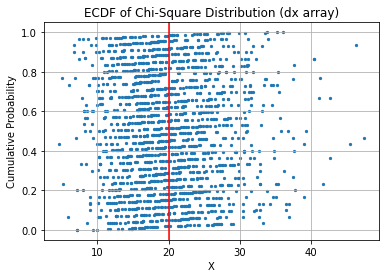

In [31]:
# Call the ECDF function
ecdf(dx, "#1f77b4")
plt.xlabel("X"), plt.ylabel("Cumulative Probability"), plt.title("ECDF of Chi-Square Distribution (dx array)")
# Draw a vertical line to indicate degree of freedom (mean)
plt.axvline(20, color="red")
plt.grid()

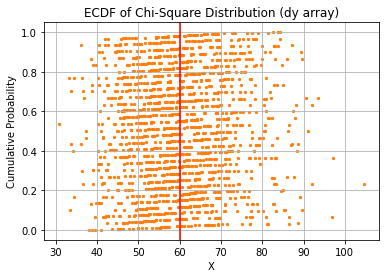

In [32]:
# Call the ECDF function
ecdf(dy, "#ff7f0e")
plt.xlabel("X"), plt.ylabel("Cumulative Probability"), plt.title("ECDF of Chi-Square Distribution (dy array)")
# Draw a vertical line to indicate degree of freedom (mean)
plt.axvline(60, color="red")
plt.grid()

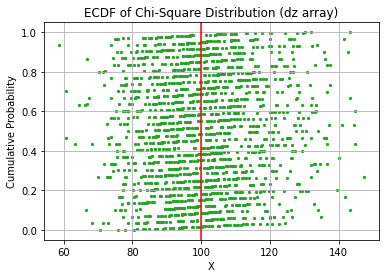

In [33]:
# Call the ECDF function
ecdf(dz, "#2ca02c")
plt.xlabel("X"), plt.ylabel("Cumulative Probability"), plt.title("ECDF of Chi-Square Distribution (dz array)")
# Draw a vertical line to indicate degree of freedom (mean)
plt.axvline(100, color="red")
plt.grid()

The plot below illustrates the ECDF of each array combined to help visualise how the degree of freedom affects the distribution of the data.

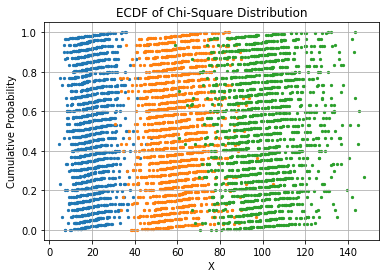

In [34]:
# Call the ECDF function for each array
ecdf(dx, "#1f77b4"), ecdf(dy, "#ff7f0e"), ecdf(dz, "#2ca02c")
plt.xlabel("X"), plt.ylabel("Cumulative Probability"), plt.title("ECDF of Chi-Square Distribution")
plt.grid()

The kernel density plot below shows how the probability density peaks at approximately the *df* value on the x-axis of each distribution.<sup>28</sup> The distribution is also wider along the x-axis and shorter along the y-axis as the degree of freedom increases. Chi-Square distributions are positively skewed, with the degree of skew decreasing as the degree of freedom increases.<sup>29</sup> It is clear from the "dz" array below that as the degree of freedom increases, the Chi-Square distribution begins to look like a normal distribution (section 4.4).

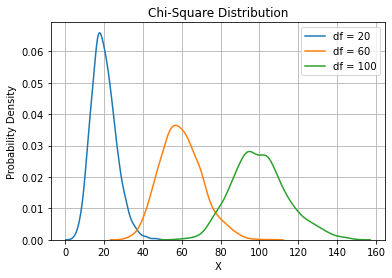

In [35]:
# Plot the three arrays with different degrees of freedom
sns.distplot(dx, label="df = 20", hist=False)
sns.distplot(dy, label="df = 60", hist=False)
sns.distplot(dz, label="df = 100", hist=False)
plt.xlabel("X"), plt.ylabel("Probability Density"), plt.title("Chi-Square Distribution")
plt.grid()

As shown in the ECDF plots, the histograms below shows how the data concentrates around the degree of freedom (i.e. mean) along the x-axis.

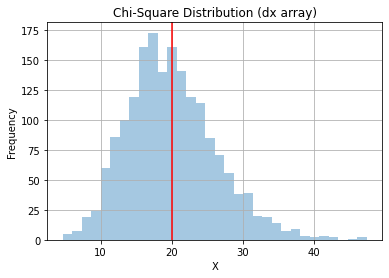

In [36]:
# Plot a histogram of the array
sns.distplot(dx, kde=False, color="#1f77b4")
plt.axvline(20, color="red")
plt.xlabel("X"), plt.ylabel("Frequency"), plt.title("Chi-Square Distribution (dx array)")
plt.grid()

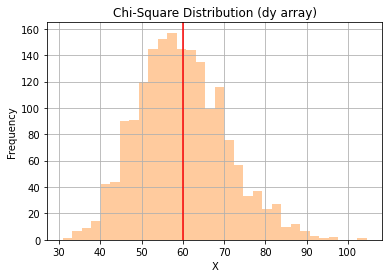

In [37]:
# Plot a histogram of the array
sns.distplot(dy, kde=False, color="#ff7f0e")
plt.axvline(60, color="red")
plt.xlabel("X"), plt.ylabel("Frequency"), plt.title("Chi-Square Distribution (dy array)")
plt.grid()

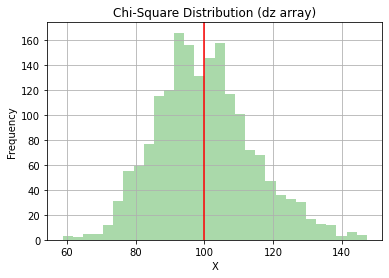

In [38]:
# Plot a histogram of the array
sns.distplot(dz, kde=False, color="#2ca02c")
plt.axvline(100, color="red")
plt.xlabel("X"), plt.ylabel("Frequency"), plt.title("Chi-Square Distribution (dz array)")
plt.grid()

#### 4.2. exponential([scale, size])

This function draws samples from an exponential distribution, which is used for describing the time until the next event e.g. failure/success etc.<sup>30</sup> It is closely related to the poisson distribution, which helps answer questions such as the number of events that occur in an interval of time. On the other hand, an exponential distrubution answers the time taken between two events occuring. It has two parameters: *scale* and *size*. The *scale* parameter must be non-negative.

The probability density function can be expressed as:

$f(x; \frac{1}{\beta}) = \frac{1}{\beta} exp(-\frac{x}{\beta})$

for x > 0 and 0 elsewhere. $\beta$ is the scale parameter, which is the inverse of the rate parameter $\lambda = 1/\beta$.<sup>31</sup>

The ```exponential()``` function below creates three 10 x 20 arrays with different scales.

In [39]:
# Create three arrays with different scales
ex = rng.exponential(scale=1, size=(10, 20))
ey = rng.exponential(scale=2, size=(10, 20))
ez = rng.exponential(scale=3, size=(10, 20))
# Print the first array
print(ex)

[[1.61626551 0.98196822 0.95256183 3.01973136 0.42322852 0.93848917
  3.84255208 0.05955924 0.04794649 4.01083557 0.91074661 2.16590869
  1.20437794 1.13227699 2.80887352 0.95369248 1.02405493 1.3557464
  1.05898013 0.29931854]
 [1.47098113 0.62001462 2.13124092 0.59984319 0.13252485 2.3592965
  0.28207534 1.24640735 2.24746086 2.34006203 0.4856138  0.05360721
  1.29116827 1.25882321 0.11976049 1.16300145 0.07806737 0.3966356
  0.2722643  1.03428164]
 [1.15643763 1.09593768 0.47946585 0.60312915 1.03991512 1.21911853
  1.32085779 0.07297572 1.60612091 1.22128353 0.57856796 0.80108371
  0.04740997 2.54473707 1.37377935 1.40721587 0.38744535 1.05760074
  0.414854   0.02948578]
 [0.91065964 0.54751688 0.21983917 0.03430002 0.01793904 1.07729521
  0.2364818  0.03635977 2.18681624 1.33981139 0.91662557 0.28878995
  1.92309967 0.12285679 0.12319654 0.43318962 1.9391563  1.57248101
  1.59413096 1.25447438]
 [3.62252542 2.30123318 0.47086446 1.11943232 1.72862509 2.015494
  0.43272642 0.525943

The ECDF of the distributions show how most of the data is close to 0 on the x-axis. Arrays with a larger scale value results in more higher values along the x-axis. The three plots below illustrate the ECDF of each array individually, with the mean indicated by a red line.

In [40]:
# Find the mean value of each array
print("Mean of ex array: ", np.mean(ex))
print("Mean of ey array: ", np.mean(ey))
print("Mean of ez array: ", np.mean(ez))

Mean of ex array:  0.9807222464209266
Mean of ey array:  1.8545389064522302
Mean of ez array:  2.988716072352703


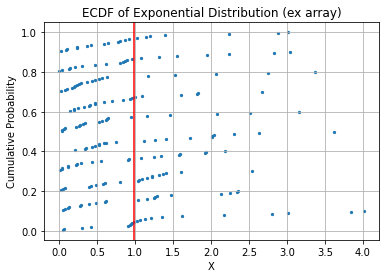

In [41]:
# Call the ECDF function
ecdf(ex, "#1f77b4")
plt.axvline(np.mean(ex), color="red")
plt.xlabel("X"), plt.ylabel("Cumulative Probability"), plt.title("ECDF of Exponential Distribution (ex array)")
plt.grid()

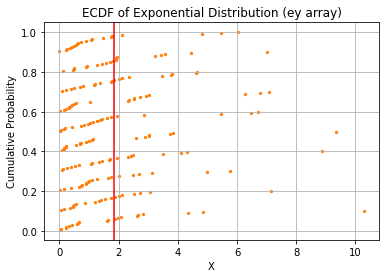

In [42]:
# Call the ECDF function
ecdf(ey, "#ff7f0e")
plt.axvline(np.mean(ey), color="red")
plt.xlabel("X"), plt.ylabel("Cumulative Probability"), plt.title("ECDF of Exponential Distribution (ey array)")
plt.grid()

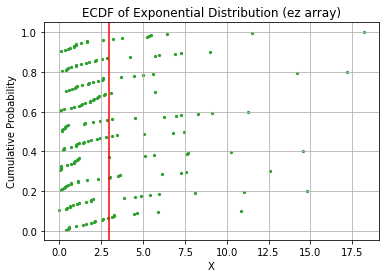

In [43]:
# Call the ECDF function
ecdf(ez, "#2ca02c")
plt.axvline(np.mean(ez), color="red")
plt.xlabel("X"), plt.ylabel("Cumulative Probability"), plt.title("ECDF of Exponential Distribution (ez array)")
plt.grid()

The plot below illustrates the ECDF of each array combined to help visualise how different scales affect the distribution of the data. It is clear that when generating a random sample from an exponential distribution, most of the numbers in the sample will be close to zero, and larger numbers are less likely.

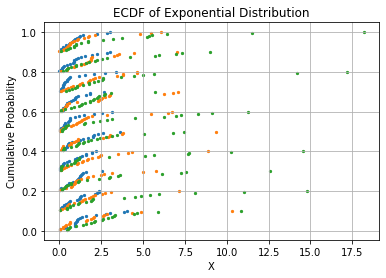

In [44]:
# Call the ECDF function for each array
ecdf(ex, "#1f77b4"), ecdf(ey, "#ff7f0e"), ecdf(ez, "#2ca02c")
plt.xlabel("X"), plt.ylabel("Cumulative Probability"), plt.title("ECDF of Exponential Distribution")
plt.grid()

The kernel density plot below shows how the probability density is much higher at a smaller scale and tapers off quite quickly for higher values of x. The peaks of the other two arrays are much lower. An exponential function can describe growth or decay. The function

$g(x) = (\frac{1}{2})^x$

is an example of exponential decay. The *scale* parameter determines how quickly the frequency of larger values of x falls towards zero.<sup>32</sup> This is evident in the kernel density plot below.

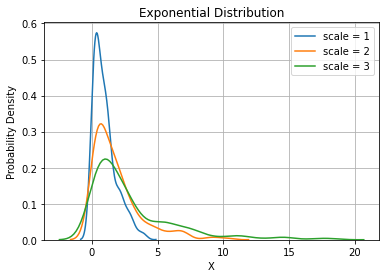

In [45]:
# Plot the three arrays with different scales
sns.distplot(ex, label="scale = 1", hist=False)
sns.distplot(ey, label="scale = 2", hist=False)
sns.distplot(ez, label="scale = 3", hist=False)
plt.xlabel("X"), plt.ylabel("Probability Density"), plt.title("Exponential Distribution")
plt.grid()

As shown in the ECDF plots, the histograms below shows how most of the data is skewed left in each array.

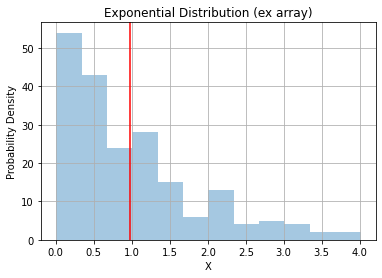

In [46]:
# Plot a histogram of the array
sns.distplot(ex, kde=False, color="#1f77b4")
plt.axvline(np.mean(ex), color="red")
plt.xlabel("X"), plt.ylabel("Probability Density"), plt.title("Exponential Distribution (ex array)")
plt.grid()

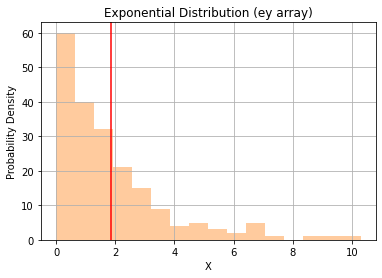

In [47]:
# Plot a histogram of the array
sns.distplot(ey, kde=False, color="#ff7f0e")
plt.axvline(np.mean(ey), color="red")
plt.xlabel("X"), plt.ylabel("Probability Density"), plt.title("Exponential Distribution (ey array)")
plt.grid()

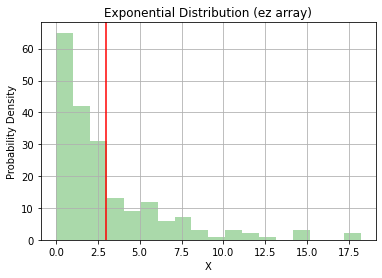

In [48]:
# Plot a histogram of the array
sns.distplot(ez, kde=False, color="#2ca02c")
plt.axvline(np.mean(ez), color="red")
plt.xlabel("X"), plt.ylabel("Probability Density"), plt.title("Exponential Distribution (ez array)")
plt.grid()

As this distribution is often used to model waiting times between events, it can be used to simulate the expected lifetime in years of a computer part that, for example, lasts 10 years on average. The adapted code below illustrates this.<sup>58</sup>

Text(11, 0.045, '10 years')

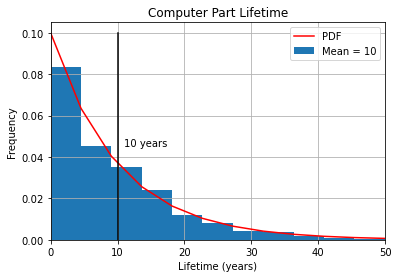

In [49]:
# 10 refers to the lifetime of part in years and 1000 refers to the number of parts to test
ew = rng.exponential(10, 1000)
count, bins, ignored = plt.hist(ew, 20, density=True, label="Mean = 10")

# Calculate theoretical lifetime probability
exp_pdf = lambda s, x: (1 / s ) * np.exp( - (x / s) )
plt.plot(bins, exp_pdf(10, bins), color="r", label="PDF")
plt.xlim(0, 50)

plt.title("Computer Part Lifetime"), plt.xlabel("Lifetime (years)"), plt.ylabel("Frequency")
plt.legend()
plt.grid()
plt.plot([10, 10], [0, 0.1], "k-")
plt.text(11, 0.045, "10 years")

#### 4.3. geometric(p[, size])

This function draws samples from the geometric distribution. A Bernoulli trial is a random experiment with exactly two possible outcomes, "success" and "failure" (e.g. flipping a coin), in which the probability of success is the same every time the experiment is conducted.<sup>33</sup> The geometric distribution models the number of trials that must be run in order to achieve success. It takes two parameters: *p* and *size*.

The probability density function can be expressed as:

$f(k) = (1 - p)^{k-1}p$

where *k* is a positive integer and *p* is the probability of success of an individual trial where $0<p≤1$.<sup>34</sup>

The ```geometric()``` function below creates three arrays of the same size with different probabilities of success.

In [50]:
# Create three arrays with different probabilities of success
fx = rng.geometric(p=0.3, size=1000)
fy = rng.geometric(p=0.5, size=1000)
fz = rng.geometric(p=0.7, size=1000)
# Print the first array
print(fx)

[ 1  3  4  2  1  4  3 10  1  1  1  1  4  2  1  1  7  5  4  3  1  6  2  3
  3  3  4  5  2  3  4  3  5  1  1  1  1  2  1  1  1  1  4  3  4  2  1  3
  2  8  1  3  3  4  3  1  4  1  2  2  2  2  2  4  6  2  4  1  1  1  2  2
  1  5 10  7  5  1  2  4  4  4  1  1  1  5  2  4  5  5  4  7  2  5  2  1
  7  3  4  2  3  1  1  1  7  1  1  2  3  3  2  4  2  3  9  2  2  5  3  3
  1  5  3  2  4  5  1  1  9  1  1  1  4  2  4  5  3  2 14  4  5  1  6  1
  3  4  5  4  5  2  1  2  6  3  5  1  6  1  6  7  1  3  5  1  5  4  2  4
  1  1  4  1  1  2  3  4  1  5  3  2  7  1  2  1  2  2  5  1  1  2  8  1
  5  1  3  1  4  9  1  1  2  4  3  5  3  3  3  1  4  3  1  1 19  5  2  4
  4  2  1  8 12  1  2  1  1  6  4  1  4  7  2  3  6  5  2  3  3  1  2  2
  2  3  7  1  2  5  1  7 13  2  1  9  2  1  2  6  1  2  3  3  2  2  4  3
  1  1  6  1  2  4  4  2  1  3 11  2  4 10  5  3  2  1  4  1  1  8  1  8
  4  1  2  8  1  1  2  4  4  6  1  2  2  4  2  1  2  2  2  3  1  4  2  3
  3  4  2  7  5  1  1  4  4  1 11  1  8  2  6  3  1

Similar to the ```exponential()``` funciton, the ECDF of the distributions show how most of the data is close to 0 on the x-axis. It is a discrete analog of the exponential distribution.<sup>35</sup> Arrays with a larger probability of success results in more higher values along the x-axis. The three plots below illustrate the ECDF of each array individually, with the mean indicated by a red line.

In [51]:
# Find the mean value of each array
print("Mean of fx array: ", np.mean(fx))
print("Mean of fy array: ", np.mean(fy))
print("Mean of fz array: ", np.mean(fz))

Mean of fx array:  3.17
Mean of fy array:  1.957
Mean of fz array:  1.432


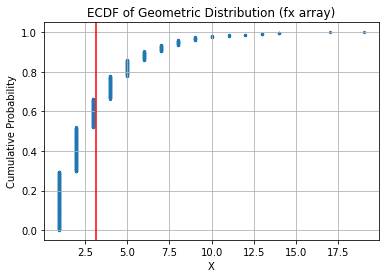

In [52]:
# Call the ECDF function
ecdf(fx, "#1f77b4")
plt.axvline(np.mean(fx), color="red")
plt.xlabel("X"), plt.ylabel("Cumulative Probability"), plt.title("ECDF of Geometric Distribution (fx array)")
plt.grid()

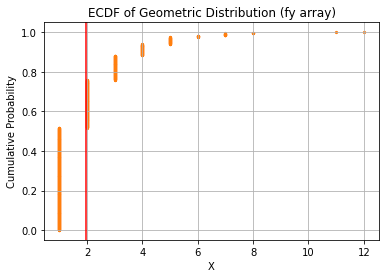

In [53]:
# Call the ECDF function
ecdf(fy, "#ff7f0e")
plt.axvline(np.mean(fy), color="red")
plt.xlabel("X"), plt.ylabel("Cumulative Probability"), plt.title("ECDF of Geometric Distribution (fy array)")
plt.grid()

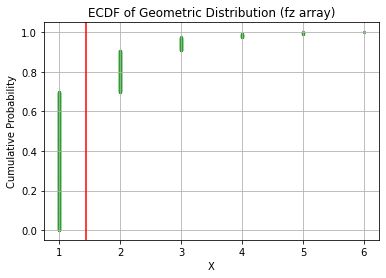

In [54]:
# Call the ECDF function
ecdf(fz, "#2ca02c")
plt.axvline(np.mean(fz), color="red")
plt.xlabel("X"), plt.ylabel("Cumulative Probability"), plt.title("ECDF of Geometric Distribution (fz array)")
plt.grid()

The plot below illustrates the ECDF of each array combined to help visualise how different probabilities of success affect the distribution of the data.

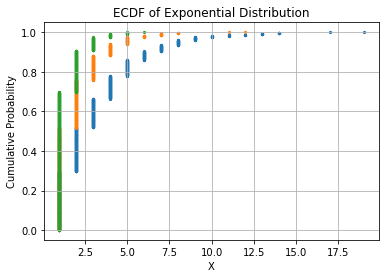

In [55]:
# Call the ECDF function for each array
ecdf(fx, "#1f77b4"), ecdf(fy, "#ff7f0e"), ecdf(fz, "#2ca02c")
plt.xlabel("X"), plt.ylabel("Cumulative Probability"), plt.title("ECDF of Exponential Distribution")
plt.grid()

The kernel density plot below shows how the probability density is much higher at a higher *p* value and tapers off quite quickly for higher values of x.

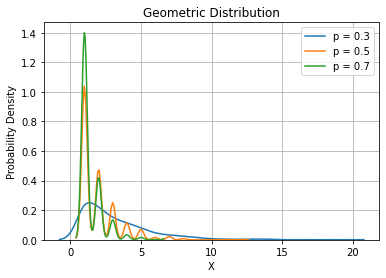

In [56]:
# Plot the three arrays with different probabilities of success
sns.distplot(fx, label="p = 0.3", hist=False)
sns.distplot(fy, label="p = 0.5", hist=False)
sns.distplot(fz, label="p = 0.7", hist=False)
plt.xlabel("X"), plt.ylabel("Probability Density"), plt.title("Geometric Distribution")
plt.grid()

As shown in the ECDF plots, the histograms below show how most of the data is skewed left in each array. As this is a discrete distribution, there are notable gaps in the histograms. This is because a histogram is typically meant to illustrate the frequency distribution of a continuous numeric variable.<sup>51</sup>

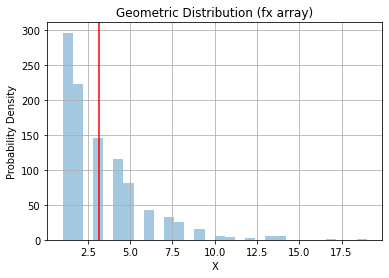

In [57]:
# Plot a histogram of the array
sns.distplot(fx, kde=False, color="#1f77b4")
plt.axvline(np.mean(fx), color="red")
plt.xlabel("X"), plt.ylabel("Probability Density"), plt.title("Geometric Distribution (fx array)")
plt.grid()

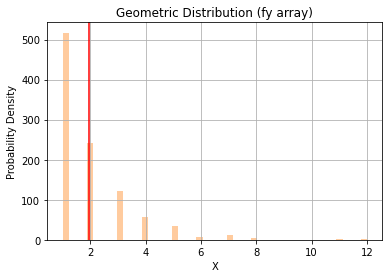

In [58]:
# Plot a histogram of the array
sns.distplot(fy, kde=False, color="#ff7f0e")
plt.axvline(np.mean(fy), color="red")
plt.xlabel("X"), plt.ylabel("Probability Density"), plt.title("Geometric Distribution (fy array)")
plt.grid()

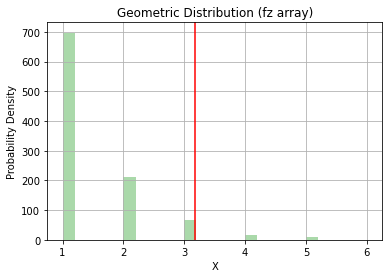

In [59]:
# Plot a histogram of the array
sns.distplot(fz, kde=False, color="#2ca02c")
plt.axvline(np.mean(fx), color="red")
plt.xlabel("X"), plt.ylabel("Probability Density"), plt.title("Geometric Distribution (fz array)")
plt.grid()

As a geometric function is one that represents the number of failures before success, a real-world example would be asking people outside a polling station who they voded for until a person is found to have voted for the chosen candidate.<sup>61</sup> The geometric distribution represents the number of people included in the poll. The example below creates a distribution whereby there are 5 candidates and 1000 people polled. As there are 5 candidates, the probability is 0.2.

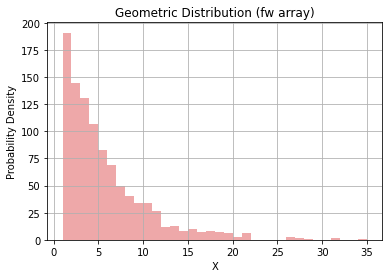

In [60]:
# Create an array with a probability of success of 0.2
fw = rng.geometric(p=0.2, size=1000)
# Plot a histogram of the array
sns.distplot(fw, kde=False, color="#d62728")
plt.xlabel("X"), plt.ylabel("Probability Density"), plt.title("Geometric Distribution (fw array)")
plt.grid()

#### 4.4. normal([loc, scale, size])

This function draws samples from a normal (Gaussian) distribution. It is one of the most important distributions and fits the probability distribution of many events, e.g. IQ scores, heartbeat etc. It has three parameters. *loc* (mean) is where the peak of the bell exists, *scale* (standard deviation) is how flat the graph distribution should be, and *size* is the shape of the returned array.<sup>36</sup>

The probability density function can be expressed as:

$f(x) = \frac{e^-(x-\mu)^2/(2\sigma^2)}{\sigma\sqrt2\pi}$

where $\mu$ is the location parameter and $\sigma$ is the scale parameter. The case where $\mu = 0$ and $\sigma = 1$ is called the standard normal distribution.<sup>37</sup>

As illustrated in the previous distributions, data can be distributed in different ways. However, there are cases where data tends to be around a central value with no bias left or right. In a normal distribution, 50% of the values are less than the mean and 50% are greater than the mean.<sup>38</sup>

A normally distributed data set will produce a bell curve as shown below. The distribution is often referred to as the bell curve due to this characteristic shape. One standard deviation from the mean accounts for 68.2% of occurrences, while two covers 95.4% and so on.<sup>55</sup>

![Normal Distribution](normal_distribution.png)


The ```normal()``` function below creates three arrays of the same size with different mean values.

In [61]:
# Construct a new Generator
rng = np.random.default_rng()
# Create three arrays with different mean values
gx = rng.normal(loc=0, scale=2, size=(10, 30))
gy = rng.normal(loc=5, scale=2, size=(10, 30))
gz = rng.normal(loc=10, scale=2, size=(10, 30))
# Print the first array
print(gx)

[[ 4.28859672  0.10331676  0.43246414 -0.51962993  3.69366039  1.32995382
   0.0442248  -0.2685298   1.11327509 -3.10495143 -0.78499018  2.29773096
   3.04958039 -2.5581308   0.58981811 -2.46826581 -0.63963821 -0.80536317
   3.29887126 -3.71612259  0.55590381  1.90301869  1.64541828 -2.19364364
  -1.67231523 -2.27708108  0.43245463 -1.5903204   1.58784977 -3.03114691]
 [ 0.76473093  1.88638332 -0.87168419  3.00982829 -1.10662709  1.75650009
  -0.95698646 -1.73420885  2.81188835  0.63395083 -0.06979396  4.39640996
  -0.17573792  4.80006017 -3.38705679  1.7853841   1.96126915  1.49480092
   0.40039897 -1.61139686 -1.60382752  0.27204589  1.97384976 -0.2078139
   0.13327953  4.29611799  1.28044686  0.40104709 -3.53230917 -3.86641839]
 [-0.97077931 -3.40904571 -0.71079108  1.01593244 -0.64688918  2.95797012
  -3.57841602 -0.49038996  2.71936074  0.4475089   4.33359996  0.31580198
   2.0284264   0.01114396 -4.45046257 -1.05526146  0.50304827  2.60227466
  -0.40931451 -0.75629967  2.68215016

In [62]:
# Find the mean value of each array
print("Mean of gx array: ", np.mean(gx))
print("Mean of gy array: ", np.mean(gy))
print("Mean of gz array: ", np.mean(gz))

Mean of gx array:  0.12605443220580728
Mean of gy array:  5.078120173462607
Mean of gz array:  10.00793404647236


The ECDF of the distributions show how evenly distributed the data is. The three plots below illustrate the ECDF of each array individually, with the mean indicated by a red line.

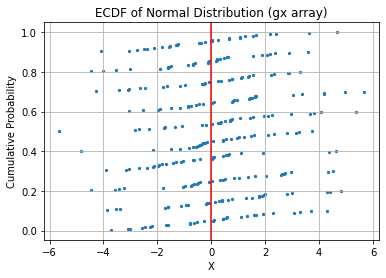

In [63]:
# Call the ECDF function
ecdf(gx, "#1f77b4")
# Draw a vertical line to indicate the mean
plt.axvline(0, color="red")
plt.xlabel("X"), plt.ylabel("Cumulative Probability"), plt.title("ECDF of Normal Distribution (gx array)")
plt.grid()

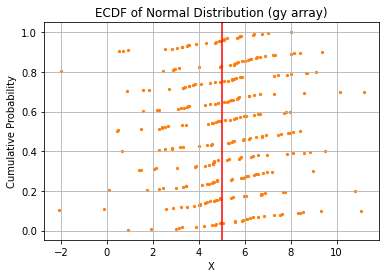

In [64]:
# Call the ECDF function
ecdf(gy, "#ff7f0e")
# Draw a vertical line to indicate the mean
plt.axvline(5, color="red")
plt.xlabel("X"), plt.ylabel("Cumulative Probability"), plt.title("ECDF of Normal Distribution (gy array)")
plt.grid()

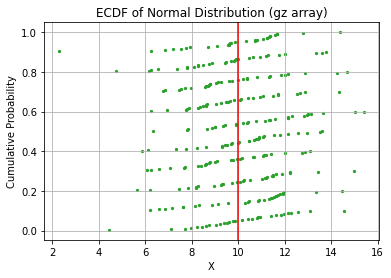

In [65]:
# Call the ECDF function
ecdf(gz, "#2ca02c")
# Draw a vertical line to indicate the mean
plt.axvline(10, color="red")
plt.xlabel("X"), plt.ylabel("Cumulative Probability"), plt.title("ECDF of Normal Distribution (gz array)")
plt.grid()

The plot below illustrates the ECDF of each array combined.

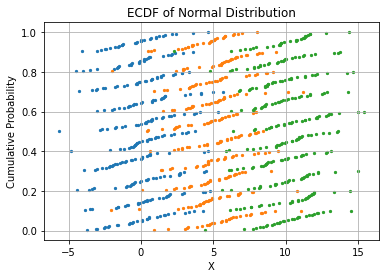

In [66]:
# Call the ECDF function for each array
ecdf(gx, "#1f77b4"), ecdf(gy, "#ff7f0e"), ecdf(gz, "#2ca02c")
plt.xlabel("X"), plt.ylabel("Cumulative Probability"), plt.title("ECDF of Normal Distribution")
plt.grid()

The kernel density plot below shows how symmetrical each of the arrays are.

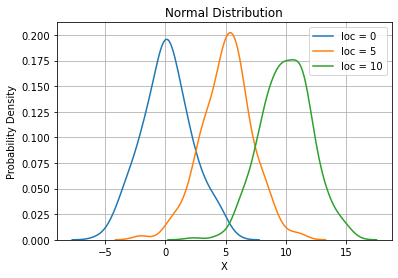

In [67]:
# Plot the three arrays with different mean values
sns.distplot(gx, label="loc = 0", hist=False)
sns.distplot(gy, label="loc = 5", hist=False)
sns.distplot(gz, label="loc = 10", hist=False)
plt.xlabel("X"), plt.ylabel("Probability Density"), plt.title("Normal Distribution")
plt.grid()

As shown in the ECDF plots, the histograms below show how the data near the mean are more frequent in occurrence than data far from the mean, which produces a symmetric, unimodal distribution.

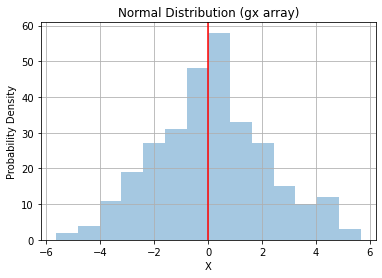

In [68]:
# Plot a histogram of the array
sns.distplot(gx, kde=False, color="#1f77b4")
# Draw a vertical line to indicate the mean
plt.axvline(0, color="red")
plt.xlabel("X"), plt.ylabel("Probability Density"), plt.title("Normal Distribution (gx array)")
plt.grid()

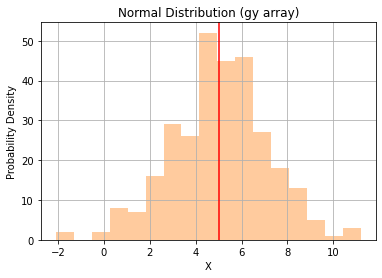

In [69]:
# Plot a histogram of the array
sns.distplot(gy, kde=False, color="#ff7f0e")
# Draw a vertical line to indicate the mean
plt.axvline(5, color="red")
plt.xlabel("X"), plt.ylabel("Probability Density"), plt.title("Normal Distribution (gy array)")
plt.grid()

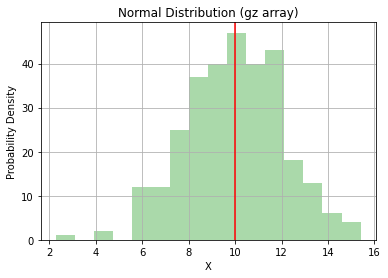

In [70]:
# Plot a histogram of the array
sns.distplot(gz, kde=False, color="#2ca02c")
# Draw a vertical line to indicate the mean
plt.axvline(10, color="red")
plt.xlabel("X"), plt.ylabel("Probability Density"), plt.title("Normal Distribution (gz array)")
plt.grid()

The function below creates three arrays of the same size and mean, but with different *scale* (standard deviation) values. As illustrated in the kernel density plot, the distribution becomes flatter when increasing the *scale* value.

In [71]:
# Construct a new Generator
rng = np.random.default_rng()
# Create three arrays with different scales
gx_a = rng.normal(loc=0, scale=2, size=(10, 30))
gy_b = rng.normal(loc=0, scale=4, size=(10, 30))
gz_c = rng.normal(loc=0, scale=6, size=(10, 30))
# Print the first array
print(gx_a)

[[ 1.96116851  1.04196808 -1.62037454 -0.51862512 -1.86251958  0.8653271
  -0.84490479  0.80154231 -1.18493294 -1.02521952  1.03608758  2.09240971
  -3.00409401  1.37301018 -0.46486159  0.30418402 -1.44986587 -1.80213969
  -1.16110265 -1.54163828 -1.55797429 -1.04655222 -1.18279837  0.03297388
  -0.26093115 -5.44379969 -3.86285036 -3.9383189  -1.07679099 -0.15410072]
 [ 1.30579732  4.02294584 -0.74834765  3.04757774 -1.8059422   1.77377325
   0.45825965 -4.06476106  1.02904133 -1.68685331 -0.84016124 -0.17253778
   0.09136382  3.00656212 -1.7051599  -0.55302946  0.98277752  2.13926751
   1.69090974  0.53873264  3.65999912 -0.63984382  0.48262215 -3.15822668
  -2.63253562 -3.06406572 -0.55278995  4.02948344 -3.93596162  1.77682019]
 [-0.08801212  0.82053856 -0.78660568 -0.06651007  0.79592503 -0.44585687
   1.53596465  2.69144908 -0.21439735  2.27971227 -0.70365569  0.04581035
   0.84915482 -0.94701903 -1.76347207  1.42770823  0.70347756 -3.49176257
  -3.22929413  3.04721734 -0.29392569

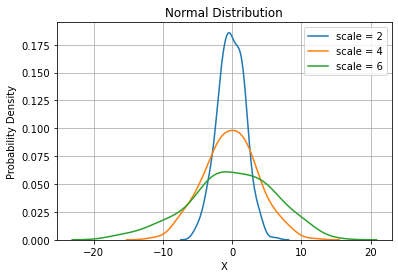

In [72]:
# Plot the three arrays with different scales
sns.distplot(gx_a, label="scale = 2", hist=False)
sns.distplot(gy_b, label="scale = 4", hist=False)
sns.distplot(gz_c, label="scale = 6", hist=False)
plt.xlabel("X"), plt.ylabel("Probability Density"), plt.title("Normal Distribution")
plt.grid()

To demonstrate a real-world application, the data below comes from the public ANSUR2 data set. This data set comprises data from the US Army Anthropometry survey, which took measurments of its male military population.<sup>62</sup> It illustrates the bell curve characteristic of the normal distribution.

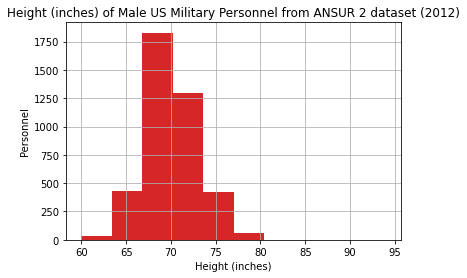

In [73]:
# Read the data set
df = pd.read_csv("ANSURIIMALEPublic.csv", encoding="ISO-8859-1")
# Access the relevant column in the data set
heights = df.loc[:,"Heightin"] 
# Plot histogram
plt.hist(heights, color="#d62728")
plt.title("Height (inches) of Male US Military Personnel from ANSUR 2 dataset (2012)")
plt.xlabel("Height (inches)"), plt.ylabel("Personnel")
plt.grid()

#### 4.5. rayleigh([scale, size])

This function draws samples from a rayleigh distribution. The rayleigh distribution is used in signal processing. It can also be used in engineering to measure the lifetime of an object, where the lifetime depends on the age of the object.<sup>39</sup> It has two parameters, *scale* and *size*.<sup>40</sup>

The probability density function can be expressed as:

$f(x;\sigma) = \frac{x}{\sigma^2}e^{-x^2/(2\sigma^2)}$

where $\sigma$ is the scale parameter of the distribution.<sup>41</sup>

The ```rayleigh()``` function below creates three arrays of the same size with different scales.

In [74]:
# Create three arrays with different scales
hx = rng.rayleigh(scale=2, size=(10, 30))
hy = rng.rayleigh(scale=4, size=(10, 30))
hz = rng.rayleigh(scale=6, size=(10, 30))
# Print the first array
print(hx)

[[0.32593976 1.56046642 2.67696809 1.30923043 3.09640773 5.69111246
  3.37931675 3.3333355  2.17834291 1.96977734 3.37155444 0.35223889
  4.26861083 3.65115    1.37061949 1.71416143 2.02813409 3.23649091
  2.30759723 3.19926299 2.20495684 3.17397529 3.82137441 3.68396481
  3.22135616 1.89726122 1.04487266 3.23385201 0.98671747 4.64566369]
 [2.43339139 1.07860743 0.79032508 3.35524329 4.62388495 2.80870425
  1.41454651 3.68231484 5.62884248 4.0116409  2.53272656 3.14739738
  3.16001196 1.90763833 4.52539547 3.93031278 0.80772513 2.27772729
  4.66163115 4.9366458  6.60662608 2.9698451  1.32196768 5.16323159
  2.76432453 4.56867895 2.49158578 1.68379123 3.36197075 3.32666873]
 [1.19482059 3.6561181  2.23549215 3.99570492 3.53427366 1.2337294
  1.38209344 2.84097097 4.96737149 1.76971127 5.35206842 1.44423406
  0.36457862 1.24548833 1.99200619 2.88540135 2.42078755 4.56361124
  0.4174895  1.12942269 0.50347803 3.3824719  2.73402759 1.60923501
  2.86824269 5.64448449 0.40208332 2.82487555 2

In [75]:
print("Mean of hx array: ", np.mean(hx))
print("Mean of hy array: ", np.mean(hy))
print("Mean of hz array: ", np.mean(hz))

Mean of hx array:  2.5245884674854135
Mean of hy array:  5.223632638447329
Mean of hz array:  7.733631283891625


The three plots below illustrate the ECDF of each array individually, with the mean indicated by a red line.

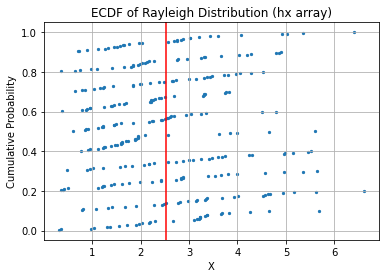

In [76]:
# Call the ECDF function
ecdf(hx, "#1f77b4")
# Draw a vertical line to indicate the mean
plt.axvline(np.mean(hx), color="red")
plt.xlabel("X"), plt.ylabel("Cumulative Probability"), plt.title("ECDF of Rayleigh Distribution (hx array)")
plt.grid()

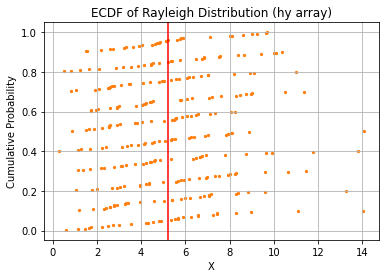

In [77]:
# Call the ECDF function
ecdf(hy, "#ff7f0e")
# Draw a vertical line to indicate the mean
plt.axvline(np.mean(hy), color="red")
plt.xlabel("X"), plt.ylabel("Cumulative Probability"), plt.title("ECDF of Rayleigh Distribution (hy array)")
plt.grid()

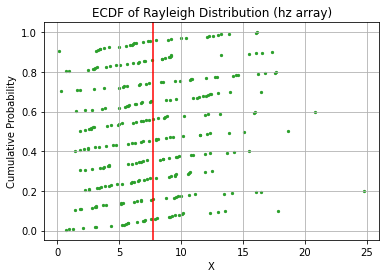

In [78]:
# Call the ECDF function
ecdf(hz, "#2ca02c")
# Draw a vertical line to indicate the mean
plt.axvline(np.mean(hz), color="red")
plt.xlabel("X"), plt.ylabel("Cumulative Probability"), plt.title("ECDF of Rayleigh Distribution (hz array)")
plt.grid()

The plot below illustrates the ECDF of each array combined to help visualise how different scales affect the distribution of the data.

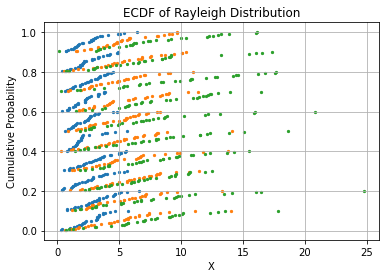

In [79]:
# Call the ECDF function for each array
ecdf(hx, "#1f77b4"), ecdf(hy, "#ff7f0e"), ecdf(hz, "#2ca02c")
plt.xlabel("X"), plt.ylabel("Cumulative Probability"), plt.title("ECDF of Rayleigh Distribution")
plt.grid()

The kernel density plot below shows how as the *scale* parameter increases, the distribution gets wider and shifts to the right. As a result, the maximum height decreases to preserve the area under the curve being equal to 1.

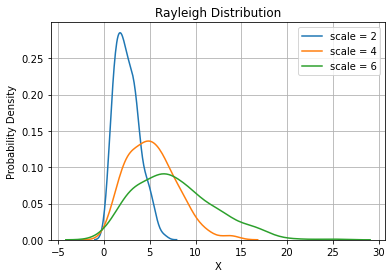

In [80]:
# Plot the three arrays with different scales
sns.distplot(hx, label="scale = 2", hist=False)
sns.distplot(hy, label="scale = 4", hist=False)
sns.distplot(hz, label="scale = 6", hist=False)
plt.xlabel("X"), plt.ylabel("Probability Density"), plt.title("Rayleigh Distribution")
plt.grid()

As shown in the ECDF plots, the histograms below show how the data near the mean are more frequent in occurrence than data far from the mean. However, it is apparent that the distribution in each array is skewed slightly to the left of the mean.

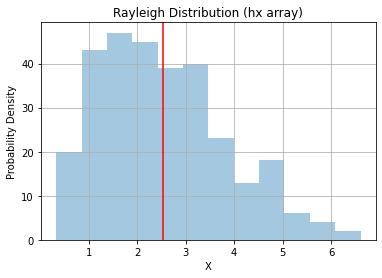

In [81]:
# Plot a histogram of the array
sns.distplot(hx, kde=False, color="#1f77b4")
# Draw a vertical line to indicate the mean
plt.axvline(np.mean(hx), color="red")
plt.xlabel("X"), plt.ylabel("Probability Density"), plt.title("Rayleigh Distribution (hx array)")
plt.grid()

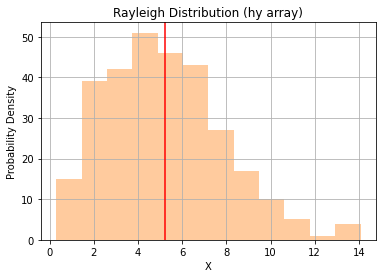

In [82]:
# Plot a histogram of the array
sns.distplot(hy, kde=False, color="#ff7f0e")
# Draw a vertical line to indicate the mean
plt.axvline(np.mean(hy), color="red")
plt.xlabel("X"), plt.ylabel("Probability Density"), plt.title("Rayleigh Distribution (hy array)")
plt.grid()

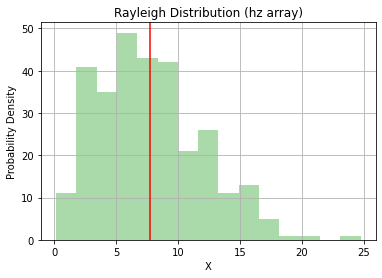

In [83]:
# Plot a histogram of the array
sns.distplot(hz, kde=False, color="#2ca02c")
# Draw a vertical line to indicate the mean
plt.axvline(np.mean(hz), color="red")
plt.xlabel("X"), plt.ylabel("Probability Density"), plt.title("Rayleigh Distribution (hz array)")
plt.grid()

Jowder (2006) models wind speed using the rayleigh distribution.<sup>59</sup> The example below assumes a wind speed of 7 m/s.

Text(10.5, 0.08, '$speed=10ms^{-1}$')

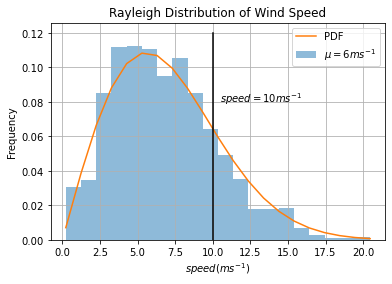

In [84]:
# Store the wind speed in a variable
wind_speed = 7
# Calculate the scale
scale = wind_speed / (m.sqrt((m.pi) / 2))
# Calculate the wind speed distribution
hw = rng.rayleigh(scale, 1000)
count, bins, ignored = plt.hist(hw, 20, alpha=0.5, density=True, label="$\mu=6 ms^{-1}$")
# Generate theoretical PDF
pdf = lambda s, x: (x / s ** 2) * (np.exp( (-x **2) / (2 * s **2)))

plt.plot(bins, pdf(scale, bins), label="PDF")
plt.title("Rayleigh Distribution of Wind Speed")
plt.xlabel("$speed (ms^{-1})$")
plt.ylabel("Frequency")
plt.legend()
plt.grid()
plt.plot([10, 10], [0, 0.12], "k-")
plt.text(10.5, 0.08, "$speed=10ms^{-1}$")

#### 4.6. standard_t(df[, size])

This function draws samples from a standard Student's t distribution with *df* degrees of freedom. It shares similar characteristics with the normal distribution, with its bell shape. However, it has a greater chance for extreme values, giving lower probability to the centre and a higher probability to the tails than the standard normal distribution.<sup>42</sup> <sup>43</sup>

The probability density function can be expressed as:

$f(t) = \frac{\Gamma(\frac{\nu+1}{2})} {\sqrt{\nu\pi}\,\Gamma(\frac{\nu}{2})} \left(1+\frac{t^2}{\nu} \right)^{\!-\frac{\nu+1}{2}}\!$

where $\nu$ is the number of degrees of freedom and $\Gamma$ is the gamma function.<sup>44</sup>

The ```standard_t()``` function below creates three arrays of the same size with different degrees of freedom.

In [85]:
# Create three arrays with different degrees of freedom
ix = rng.standard_t(2, 100)
iy = rng.standard_t(40, 100)
iz = rng.standard_t(100, 100)
# Print the first array
print(ix)

[-2.07384015e+00  1.80380536e+00 -1.96512079e+00  1.35036624e+00
 -5.60504649e-01 -1.69326734e-01  4.76597611e-01 -4.85270623e-01
 -1.03121841e+00  1.53290467e+00  2.02653103e+00 -5.49445189e-01
 -4.44230120e+00 -3.82690747e-01  1.96263346e+00  4.28588783e-01
  2.15268487e-01 -3.70837095e-01 -1.14337988e+00  7.03796382e+00
  8.03226047e-01 -6.05821021e-01  4.09718551e-02 -2.45973158e-01
 -5.27908729e+00 -2.54845977e+00  5.37740820e-01 -2.39816742e-01
 -1.05174578e+00 -1.63032816e+00 -1.08489495e+00 -3.36924311e+00
  1.23823571e+00 -9.26446244e-01  7.05349680e+00 -6.23488911e-01
 -6.79122703e-01 -4.90837871e-01  1.31806914e+00  1.61991095e-01
 -9.38291826e-02  1.66146690e+00 -3.13570285e-01  4.40929039e-01
  1.18834816e+00  4.60099718e-01  2.81627345e+00  5.61919883e+00
 -2.80583265e+00  1.56719751e-01  1.38309272e+00 -8.84047869e-01
 -2.14984674e-01  7.25062539e-01  6.61183288e-01 -5.90658997e-01
 -3.45015730e+00  2.23887962e-01 -5.25264301e-01 -7.55245617e-01
  5.23100225e-01 -1.02297

As shown below, the mean of all three arrays is approximately zero.

In [86]:
print("Mean of ix array: ", np.mean(ix))
print("Mean of iy array: ", np.mean(iy))
print("Mean of iz array: ", np.mean(iz))

Mean of ix array:  0.26430729841328127
Mean of iy array:  0.08534362135301148
Mean of iz array:  -0.0992975864997651


The three plots below illustrate the ECDF of each array individually, with the mean indicated by a red line.

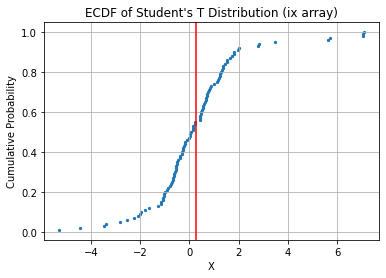

In [87]:
# Call the ECDF function
ecdf(ix, "#1f77b4")
# Draw a vertical line to indicate the mean
plt.axvline(np.mean(ix), color="red")
plt.xlabel("X"), plt.ylabel("Cumulative Probability"), plt.title("ECDF of Student\'s T Distribution (ix array)")
plt.grid()

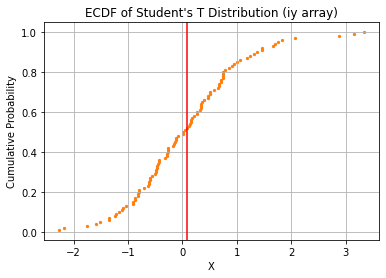

In [88]:
# Call the ECDF function
ecdf(iy, "#ff7f0e")
# Draw a vertical line to indicate the mean
plt.axvline(np.mean(iy), color="red")
plt.xlabel("X"), plt.ylabel("Cumulative Probability"), plt.title("ECDF of Student\'s T Distribution (iy array)")
plt.grid()

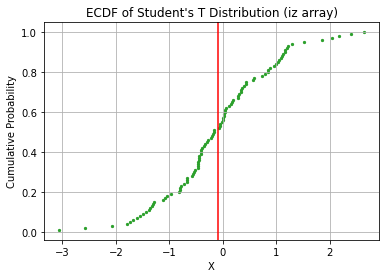

In [89]:
# Call the ECDF function
ecdf(iz, "#2ca02c")
# Draw a vertical line to indicate the mean
plt.axvline(np.mean(iz), color="red")
plt.xlabel("X"), plt.ylabel("Cumulative Probability"), plt.title("ECDF of Student\'s T Distribution (iz array)")
plt.grid()

The plot below illustrates the ECDF of each array combined to help visualise how different degrees of freedom affect the distribution of the data.

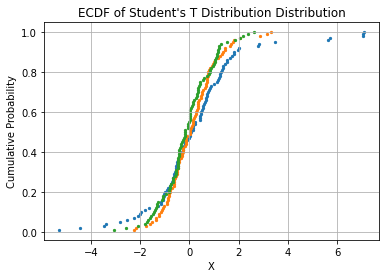

In [90]:
# Call the ECDF function for each array
ecdf(ix, "#1f77b4"), ecdf(iy, "#ff7f0e"), ecdf(iz, "#2ca02c")
plt.xlabel('X'), plt.ylabel("Cumulative Probability"), plt.title("ECDF of Student\'s T Distribution Distribution")
plt.grid()

The kernel density plot below shows how similar the distribution is to a standard normal distribution.

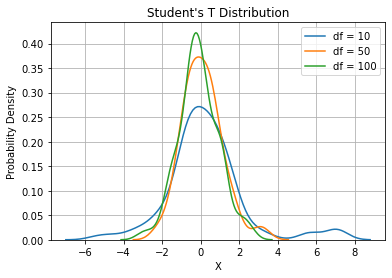

In [91]:
# Plot the three arrays with different degrees of freedom
sns.distplot(ix, label="df = 10", hist=False)
sns.distplot(iy, label="df = 50", hist=False)
sns.distplot(iz, label="df = 100", hist=False)
plt.xlabel("X"), plt.ylabel("Probability Density"), plt.title("Student's T Distribution")
plt.grid()

The histograms below illustrate how as the *df* gets larger, the distribution starts to resemble a standard normal distribution.

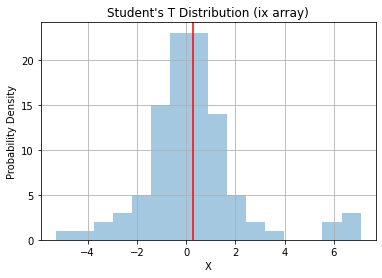

In [92]:
# Plot a histogram of the array
sns.distplot(ix, kde=False, color="#1f77b4")
# Draw a vertical line to indicate the mean
plt.axvline(np.mean(ix), color="red")
plt.xlabel("X"), plt.ylabel("Probability Density"), plt.title("Student's T Distribution (ix array)")
plt.grid()

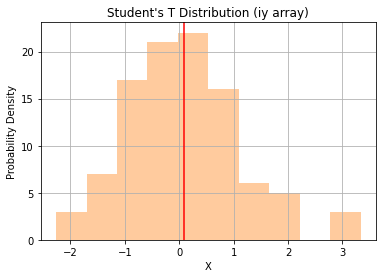

In [93]:
# Plot a histogram of the array
sns.distplot(iy, kde=False, color="#ff7f0e")
# Draw a vertical line to indicate the mean
plt.axvline(np.mean(iy), color="red")
plt.xlabel("X"), plt.ylabel("Probability Density"), plt.title("Student's T Distribution (iy array)")
plt.grid()

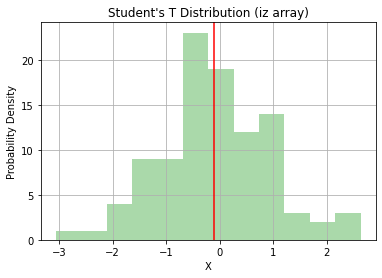

In [94]:
# Plot a histogram of the array
sns.distplot(iz, kde=False, color="#2ca02c")
# Draw a vertical line to indicate the mean
plt.axvline(np.mean(iz), color="red")
plt.xlabel("X"), plt.ylabel("Probability Density"), plt.title("Student's T Distribution (iz array)")
plt.grid()

#### 4.7. triangular(left, mode, right[, size])

This function draws samples from the triangular distribution over the interval ```[left, right]```. The function returns a random floating number between the two specified numbers, but a third parameter (the mode) can also be specified. Unlike other distributions, these parameters directly define the shape of the probability density function.<sup>45</sup> Business applications such as simulation and project management sometimes use a triangular distribution to create models when limited sample data exists.<sup>46</sup>

The ```triangular()``` function below creates three arrays of the same size with different mode values.

In [95]:
# Create three arrays with different mode values
jx = rng.triangular(10, 10, 50, 1000)
jy = rng.triangular(10, 30, 50, 1000)
jz = rng.triangular(10, 50, 50, 1000)
# Print the first array
print(jx)

[16.0400395  37.37929184 19.63381424 24.6552326  42.28592321 18.15934241
 16.05698396 29.62915669 28.40603479 17.1070946  11.53434293 17.74828135
 18.03250504 13.57082927 13.97956517 22.25657405 32.84328808 26.74442216
 28.65220303 39.33768196 36.32353699 15.76750237 10.78651985 18.71199831
 15.36643717 19.56721542 39.21573694 13.02846261 17.44263317 27.64535794
 16.08023672 44.22750639 28.58985177 32.42715463 11.04953551 18.61234567
 33.17889521 22.89696566 21.87231101 32.20638618 26.54184135 25.33085079
 17.28577219 12.00795709 29.88117911 25.46187925 18.32756627 15.49770806
 35.16657926 17.87884013 17.74455103 13.12469466 37.53856134 26.5608437
 44.36934014 13.00156868 44.47728988 16.45614373 17.01059908 22.57431005
 42.93278931 11.27355067 42.15208986 46.63388061 27.43964796 43.04800184
 10.27028109 18.17705585 17.33206078 10.90214276 28.62560058 23.2455666
 22.22052053 32.79824983 28.87433246 29.55607539 45.71977427 18.5035801
 15.63037565 11.86390564 13.95442941 46.97463436 24.48

In [96]:
# Find the mean value of each array
print("Mean of jx array: ", np.mean(jx))
print("Mean of jy array: ", np.mean(jy))
print("Mean of jz array: ", np.mean(jz))

Mean of jx array:  23.600987041809326
Mean of jy array:  29.91597225128467
Mean of jz array:  36.942352857678095


The three plots below illustrate the ECDF of each array individually, with the mean indicated by a red line. Again, the ECDF is very similar to that of the student's t distribution.

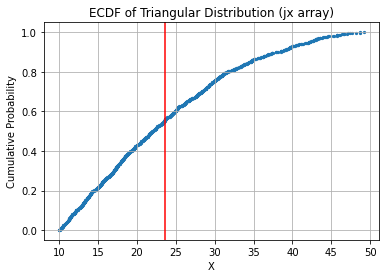

In [97]:
# Call the ECDF function
ecdf(jx, "#1f77b4")
# Draw a vertical line to indicate the mean
plt.axvline(np.mean(jx), color="red")
plt.xlabel("X"), plt.ylabel("Cumulative Probability"), plt.title("ECDF of Triangular Distribution (jx array)")
plt.grid()

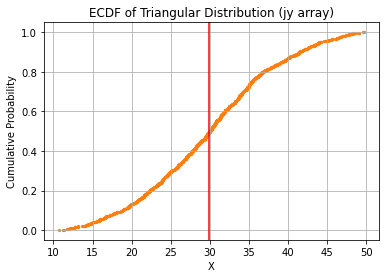

In [98]:
# Call the ECDF function
ecdf(jy, "#ff7f0e")
# Draw a vertical line to indicate the mean
plt.axvline(np.mean(jy), color="red")
plt.xlabel("X"), plt.ylabel("Cumulative Probability"), plt.title("ECDF of Triangular Distribution (jy array)")
plt.grid()

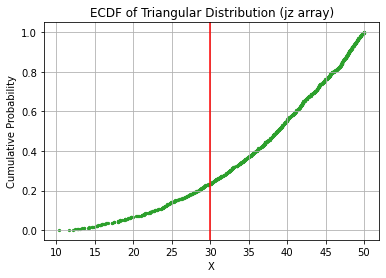

In [99]:
# Call the ECDF function
ecdf(jz, "#2ca02c")
# Draw a vertical line to indicate the mean
plt.axvline(np.mean(jy), color="red")
plt.xlabel("X"), plt.ylabel("Cumulative Probability"), plt.title("ECDF of Triangular Distribution (jz array)")
plt.grid()

The plot below illustrates the ECDF of each array combined to help visualise how different mode values affect the distribution of the data.

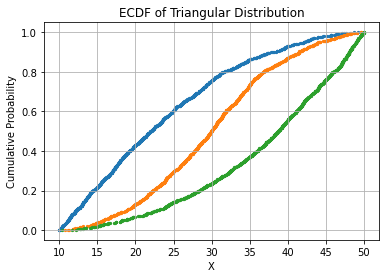

In [100]:
# Call the ECDF function for each array
ecdf(jx, "#1f77b4"), ecdf(jy, "#ff7f0e"), ecdf(jz, "#2ca02c")
plt.xlabel('X'), plt.ylabel("Cumulative Probability"), plt.title("ECDF of Triangular Distribution")
plt.grid()

The kernel density plot below shows how as the mode increases, the distribution skews further to the right.

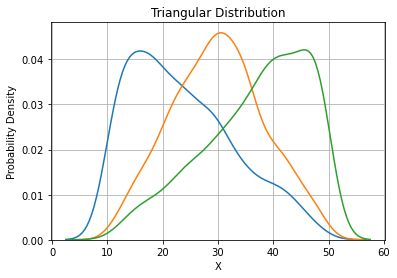

In [101]:
# Plot the three arrays with different intervals
sns.distplot(jx, hist=False)
sns.distplot(jy, hist=False)
sns.distplot(jz, hist=False)
plt.xlabel("X"), plt.ylabel("Probability Density"), plt.title("Triangular Distribution")
plt.grid()

The histograms below illustrate how the distributions have a triangular shape.

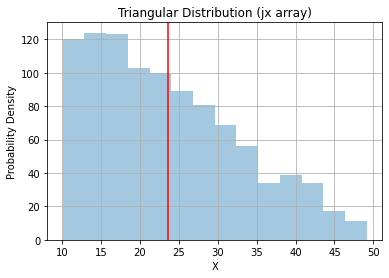

In [102]:
# Plot a histogram of the array
sns.distplot(jx, kde=False, color="#1f77b4")
# Draw a vertical line to indicate the mean
plt.axvline(np.mean(jx), color="red")
plt.xlabel("X"), plt.ylabel("Probability Density"), plt.title("Triangular Distribution (jx array)")
plt.grid()

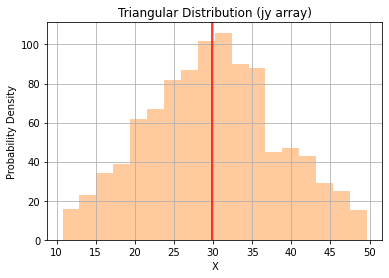

In [103]:
# Plot a histogram of the array
sns.distplot(jy, kde=False, color="#ff7f0e")
# Draw a vertical line to indicate the mean
plt.axvline(np.mean(jy), color="red")
plt.xlabel("X"), plt.ylabel("Probability Density"), plt.title("Triangular Distribution (jy array)")
plt.grid()

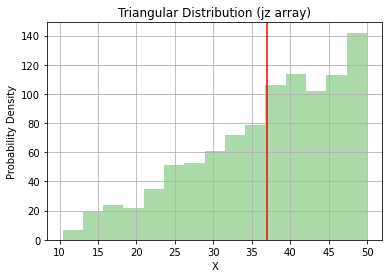

In [104]:
# Plot a histogram of the array
sns.distplot(jz, kde=False, color="#2ca02c")
# Draw a vertical line to indicate the mean
plt.axvline(np.mean(jz), color="red")
plt.xlabel("X"), plt.ylabel("Probability Density"), plt.title("Triangular Distribution (jz array)")
plt.grid()

As illustrated in the histogram below, by creating a much larger array, the triangular shape of the distribution is more apparent.

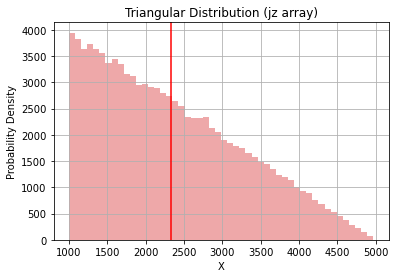

In [105]:
# Create an array
jw = rng.triangular(1000, 1000, 5000, 100000)
# Plot a histogram of the array
sns.distplot(jw, kde=False, color="#d62728")
# Draw a vertical line to indicate the mean
plt.axvline(np.mean(jw), color="red")
plt.xlabel("X"), plt.ylabel("Probability Density"), plt.title("Triangular Distribution (jz array)")
plt.grid()

#### 4.8. uniform([low, high, size])

This function draws samples from a uniform distribution. It returns a random floating number between two specified numbers (both inclusive).<sup>47</sup> A real-world example of this would be the first ball drawn in the lottery or the first card drawn from a deck of cards.

In [106]:
# Create three arrays with different intervals
kx = rng.uniform(40, 30, 10000)
ky = rng.uniform(60, 30, 10000)
kz = rng.uniform(80, 30, 10000)
# Print the first array
print(kx)

[39.87556718 38.34828642 32.66107533 ... 37.98164232 39.45495622
 38.89459499]


In [107]:
# Find the mean value of each array
print(np.mean(kx))
print(np.mean(ky))
print(np.mean(kz))

35.0373092783223
44.8728948455045
55.08450390312474


The three plots below illustrate the ECDF of each array individually, with the mean indicated by a red line. In contrast to the triangular distribution, which has a curved line, the uniform distribution is straight. This infers that any value within the given interval is equally likely to be drawn. Another observation is that the mean and median are approximately the same.

In [108]:
# Find the median value of each array
print(np.median(kx))
print(np.median(ky))
print(np.median(kz))

35.07004029012
44.73572670915593
55.17796422398992


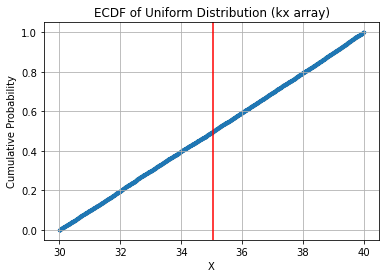

In [109]:
# Call the ECDF function
ecdf(kx, "#1f77b4")
# Draw a vertical line to indicate the mean
plt.axvline(np.mean(kx), color="red")
plt.xlabel("X"), plt.ylabel("Cumulative Probability"), plt.title("ECDF of Uniform Distribution (kx array)")
plt.grid()

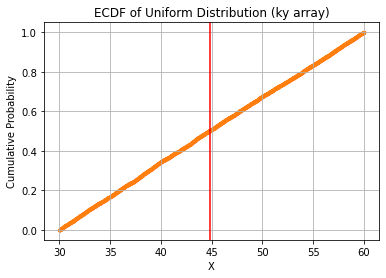

In [110]:
# Call the ECDF function
ecdf(ky, "#ff7f0e")
# Draw a vertical line to indicate the mean
plt.axvline(np.mean(ky), color="red")
plt.xlabel("X"), plt.ylabel("Cumulative Probability"), plt.title("ECDF of Uniform Distribution (ky array)")
plt.grid()

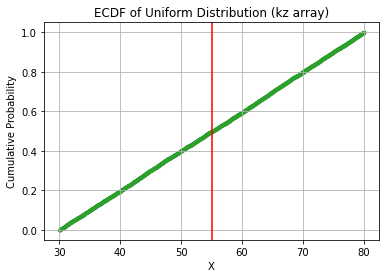

In [111]:
# Call the ECDF function
ecdf(kz, "#2ca02c")
# Draw a vertical line to indicate the mean
plt.axvline(np.mean(kz), color="red")
plt.xlabel("X"), plt.ylabel("Cumulative Probability"), plt.title("ECDF of Uniform Distribution (kz array)")
plt.grid()

The plot below illustrates the ECDF of each array combined to help visualise how a different *low* value affects the distribution of the data.

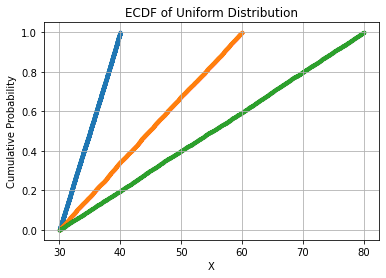

In [112]:
# Call the ECDF function for each array
ecdf(kx, "#1f77b4"), ecdf(ky, "#ff7f0e"), ecdf(kz, "#2ca02c")
plt.xlabel("X"), plt.ylabel("Cumulative Probability"), plt.title("ECDF of Uniform Distribution")
plt.grid()

The kernel density plot below shows how the probability density is almost equal across the distributions, particular those with a larger *low* value.

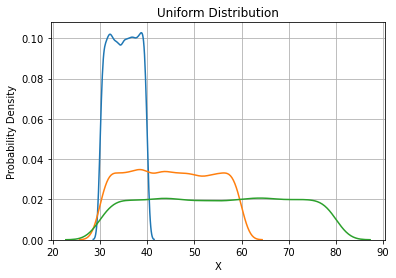

In [113]:
# Plot the three arrays with different intervals
sns.distplot(kx, hist=False)
sns.distplot(ky, hist=False)
sns.distplot(kz, hist=False)
plt.xlabel("X"), plt.ylabel("Probability Density"), plt.title("Uniform Distribution")
plt.grid()

It is apparent from the histograms below that the numbers generated by the function tend to be approximately equally distributed, meaning that theyre is no part of the interval with more random numbers than other parts. 

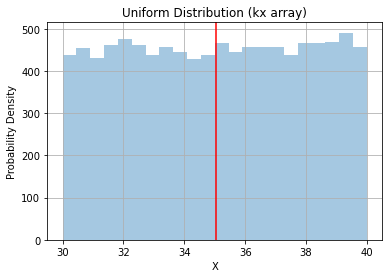

In [114]:
# Plot a histogram of the array
sns.distplot(kx, kde=False, color="#1f77b4")
# Draw a vertical line to indicate the mean
plt.axvline(np.mean(kx), color="red")
plt.xlabel("X"), plt.ylabel("Probability Density"), plt.title("Uniform Distribution (kx array)")
plt.grid()

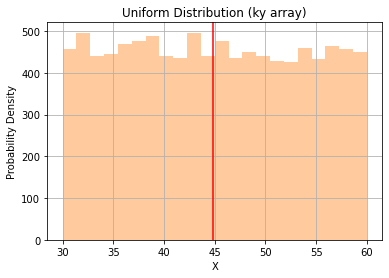

In [115]:
# Plot a histogram of the array
sns.distplot(ky, kde=False, color="#ff7f0e")
# Draw a vertical line to indicate the mean
plt.axvline(np.mean(ky), color="red")
plt.xlabel("X"), plt.ylabel("Probability Density"), plt.title("Uniform Distribution (ky array)")
plt.grid()

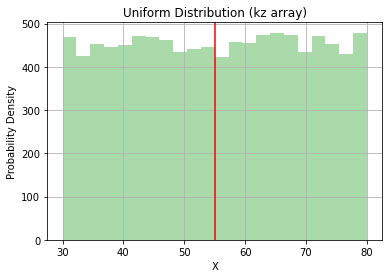

In [116]:
# Plot a histogram of the array
sns.distplot(kz, kde=False, color="#2ca02c")
# Draw a vertical line to indicate the mean
plt.axvline(np.mean(kz), color="red")
plt.xlabel("X"), plt.ylabel("Probability Density"), plt.title("Uniform Distribution (kz array)")
plt.grid()

It is evident from the histograms above that some intervals get slightly more random numbers than others. However, as the size grows, the distribution of the random numbers becomes more equal among intervals. The histogram below shows how a larger distribution looks more even.

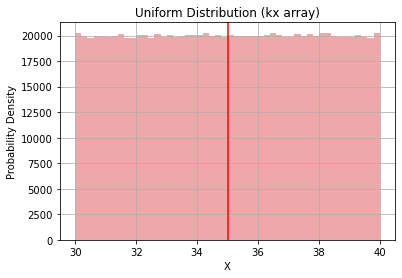

In [117]:
# Create an array
kw = rng.uniform(40, 30, 1000000)
# Plot a histogram of the array
sns.distplot(kw, kde=False, color="#d62728")
# Draw a vertical line to indicate the mean
plt.axvline(np.mean(kw), color="red")
plt.xlabel("X"), plt.ylabel("Probability Density"), plt.title("Uniform Distribution (kx array)")
plt.grid()

A real-world example of a uniform distribution would be rolling a dice, as each face has an equal chance of showing. The plot below illustrates how each face has the same probability.

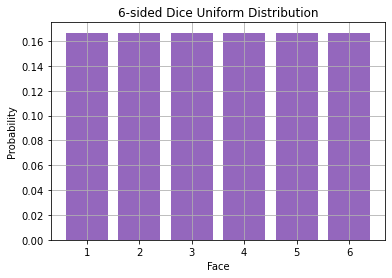

In [118]:
prob = np.full((6), 1/6)
face = [1, 2, 3, 4, 5, 6]
plt.bar(face, prob, color="#9467bd")
plt.ylabel("Probability"), plt.xlabel("Face"), plt.title("6-sided Dice Uniform Distribution")
plt.grid()

<br>

### 5. Seeds
***
Random number generators are divided into two general categories: 1) True Random Number Generators (TRNGs) and 2) Pseudo Random Number Generators (PRNGs). TRNGs are typically based on real-world phonomena such as thermal noise and radioactive decay, and are commonly used in cryptography. Although they produce non-deterministic number sequences, there are some disadvantages such as slowness and high cost. On the other hand, PRNGs produce deterministic number sequences based on a seed.<sup>53</sup>

A random seed is a number used to initialise a pseudorandom number generator. The number sequence of this generator is completely determined by the seed, and therefore if the generator is reinitialised with the same seed, it will produce the same sequence of numbers.<sup>48</sup> It can be considered a sequence of decisions made from a starting state following a particular strategy. According to Pasqualini and Parton (2020), a good pseudorandom number generator corresponds to a good strategy in a decision-making process.<sup>52</sup> $\pi$ is a commonly used seed, as it has a decimal expansion that never repeats a pattern.

According to Wolfram MathWorld<sup>60</sup>, a random number is
>*a number chosen as if by chance from some specified distribution such that selection of a large set of these numbers reproduces the underlying distribution. Almost always, such numbers are also required to be independent, so that there are no correlations between successive numbers. Computer-generated random numbers are sometimes called pseudorandom numbers, while the term "random" is reserved for the output of unpredictable physical processes. When used without qualification, the word "random" usually means "random with a uniform distribution." Other distributions are of course possible.*

In the superseded version of the package, the algorithm used to call random number generator functions, such as ```np.random.normal()```, was the Mersenne Twister. It has been a widely used and reliable means of random number generation. However, in the latest version (v1.19), the ```numpy.random``` module offers random number generators with better statistical performance than the legacy MT19937 used in ```RandomState```, with the default set to the PCG64 generator. By calling ```default_rng()```, a new instance of a Generator is obtained, providing access to a wide range of distributions.<sup>49</sup> The table below provides a summary of the comparison between the two algorithms.<sup>57</sup>

![PCG](pcg_mersenne_twister_comparison.png)
 
A permuted congruential generator (PCG) applies an output permutation function to improve the statistical properties of a modulo-$2^n$ linear congruential generator with small and fast code, and small state size. Linear congruential generators are one of the oldest and best-known PRNG algorithms. They are however known to be statistically weak, but since the PCG's state transition function only does half the work, it does not need to be perfect. The output function turns the generator's internal state into the actual random number. The PCG uses a new technique called permutation functions on tuples to produce output that is much more random than the PRNG's internal state. The output functions give a PCG it its excellent statistical performance. PCG64 is a 128-bit implementation of O'Neill's permuted congruential generator. It has a period of $2^{128}$ and supports advancing an arbitrary number of steps. Random variates are generated by permuting the output of a 128-bit LCG.<sup>50</sup> As PCG64 is a more sophisticated algorithm, it is clear why it is now the default random number generator in NumPy.

To demonstrate that random number generation is deterministic, the code below will explicitly seed the random number generator to 500 to illustrate that the same random numbers are generated. However, the sequence of numbers appears to lack any pattern, and therefore they can be considered random.

In [119]:
# Construct a new Generator
rng = np.random.default_rng(seed=500)
# Create a random uniform distribution comprising 10 floats
rng.uniform(size=10)

array([0.56674314, 0.85397799, 0.6453572 , 0.41115681, 0.46803194,
       0.82136122, 0.31252317, 0.78622079, 0.43555016, 0.24763021])

When the code is run again, but with an additional five floats, the random number sequence of the first 10 floats is exactly the same.

In [120]:
# Construct a new Generator
rng = np.random.default_rng(seed=500)
# Create a random uniform distribution comprising 10 floats
rng.uniform(size=15)

array([0.56674314, 0.85397799, 0.6453572 , 0.41115681, 0.46803194,
       0.82136122, 0.31252317, 0.78622079, 0.43555016, 0.24763021,
       0.44214554, 0.89695158, 0.5570242 , 0.52864422, 0.27598204])

If a different seed is used, completely different random numbers are generated, as shown below.

In [121]:
# Construct a new Generator
rng = np.random.default_rng(seed=501)
# Create a random uniform distribution comprising 10 floats
rng.uniform(size=10)

array([0.99642636, 0.63956651, 0.41891136, 0.55933685, 0.86131897,
       0.9933856 , 0.07328868, 0.82888267, 0.15211456, 0.72558062])

In the code below, using seed values in conjunction with a *for* loop, the same values are repeatedly generated. Without a seed value, different values are generated within the given range.<sup>56</sup>

In [122]:
# Create a for loop to generate 3 numbers
for i in range(3):   
    # Construct a new Generator
    rng = np.random.default_rng(seed=20)  
    # Generate a random number between 1 and 100 (exclusive)
    print("Random number generated with a seed: ", rng.choice(100)) 
    
for i in range (3):
    # Construct a new Generator
    rng = np.random.default_rng()
    # Generate a random number between 1 and 100 (exclusive) 
    print("Random number generated without a seed: ", rng.choice(100)) 
    

Random number generated with a seed:  89
Random number generated with a seed:  89
Random number generated with a seed:  89
Random number generated without a seed:  81
Random number generated without a seed:  79
Random number generated without a seed:  3


When using the same seed in the PCG64 generator and legacy MT19937 generator, different random numbers are generated.

In [123]:
# Construct a new Generator
rng = np.random.default_rng(12345)
rng.random()

0.22733602246716966

In [124]:
from numpy.random import Generator, MT19937

# Construct a new Generator using MT19937
rg = Generator(MT19937(12345))
rg.random()

0.37786929937474845

<br>

### 6. References
***
1. University of Central Florida, *Python Lists vs. Numpy Arrays - What is the difference?* [online] Available at: https://webcourses.ucf.edu/courses/1249560/pages/python-lists-vs-numpy-arrays-what-is-the-difference

2. DataCamp, *Random Number Generator Using Numpy* [online] Available at: https://www.datacamp.com/community/tutorials/numpy-random

3. w3schools, *Random numbers in NumPy* [online] Available at: https://www.w3schools.com/python/numpy_random.asp

4. Machine Learning Mastery, *How to Generate Random Numbers in Python* [online] Available at: https://machinelearningmastery.com/how-to-generate-random-numbers-in-python/

5. Numpy, *Random Generator* [online] Available at: https://numpy.org/doc/stable/reference/random/generator.html

6. NumPy, *numpy.random.Generator.integers* [online] Available at: https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.integers.html

7. Wolfram MathWorld, *Discrete Uniform Distribution* [online] Available at: https://mathworld.wolfram.com/DiscreteUniformDistribution.html

8. VrcAcademy, *Discrete Uniform Distribution* [online] Available at: https://vrcacademy.com/tutorials/discrete-uniform-distribution/

9. Wolfram MathWorld, *Half-Closed Interval* [online] Available at: https://mathworld.wolfram.com/Half-ClosedInterval.html

10. Wikipedia, *Interval (mathematics)* [online] Available at: https://en.wikipedia.org/wiki/Interval_(mathematics)

11. NumPy, *numpy.random.Generator.random* [online] Available at: https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.random.html

12. NumPy, *numpy.mean* [online] Available at: https://numpy.org/doc/stable/reference/generated/numpy.mean.html

13. Wikipedia, *Continuous uniform distribution* [online] Available at: https://en.wikipedia.org/wiki/Continuous_uniform_distribution

14. NumPy, *numpy.random.Generator.choice* [online] Available at: https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.choice.html

15. NumPy, *numpy.arange* [online] Available at: https://numpy.org/doc/stable/reference/generated/numpy.arange.html

16. PYnative, *Python random.choice() function to select random item from a List and Set* [online] Available at: https://pynative.com/python-random-choice/

17. Stack Overflow, *What does replacement mean in numpy.random.choice?* [online] Available at: https://stackoverflow.com/questions/40689152/what-does-replacement-mean-in-numpy-random-choice

18. NumPy, *numpy.random.Generator.bytes* [online] Available at: https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.bytes.html

19. PyProg, *numpy.random.bytes* [online] Available at: https://pyprog.pro/random_sampling_functions/bytes.html

20. NumPy, *numpy.random.Generator.shuffle* [online] Available at: https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.shuffle.html

21. w3schools, *Random permutation* [online] Available at: https://www.w3schools.com/python/numpy_random_permutation.asp

22. Stack Overflow, *shuffle vs permute numpy* [online] Available at: https://stackoverflow.com/questions/15474159/shuffle-vs-permute-numpy

23. cmdlinetips, *Empirical cumulative distribution function (ECDF) in Python* [online] Available at: https://cmdlinetips.com/2019/05/empirical-cumulative-distribution-function-ecdf-in-python/

24. The Chemical Statistician, *Exploratory Data Analysis: Conceptual Foundations of Empirical Cumulative Distribution Functions* [online] Available at: https://chemicalstatistician.wordpress.com/2013/06/24/exploratory-data-analysis-conceptual-foundations-of-empirical-cumulative-distribution-functions/

25. Wikipedia, *Chi-squared test* [online] Available at: https://en.wikipedia.org/wiki/Chi-squared_test

26. w3schools, *Chi Square Distribution* [online] Available at: https://www.w3schools.com/python/numpy_random_chisquare.asp

27. The Minitab Blog, *What Are Degrees of Freedom in Statistics?* [online] Available at: https://blog.minitab.com/blog/statistics-and-quality-data-analysis/what-are-degrees-of-freedom-in-statistics

28. Boston University School of Public Health, *Comparing Frequencies* [online] Available at: https://sphweb.bumc.bu.edu/otlt/MPH-Modules/PH717-QuantCore/PH717_ComparingFrequencies/PH717_ComparingFrequencies2.html

29. Online Statistics Education, *Chi Square Distribution* [online] Available at: http://onlinestatbook.com/2/chi_square/distribution.html

30. w3schools, *Exponential Distribution* [online] Available at: https://www.w3schools.com/python/numpy_random_exponential.asp

31. NumPy, *numpy.random.Generator.exponential* [online] Available at: https://numpy.org/doc/stable/reference/random/generated/numpy.random.exponential.html

32. Math Insight, *The exponential function* [online] Available at: https://mathinsight.org/exponential_function

33. Wikipedia, *Bernoulli trial* [online] Available at: https://en.wikipedia.org/wiki/Bernoulli_trial

34. Wikipedia, *Geometric distribution* [online] Available at: https://en.wikipedia.org/wiki/Geometric_distribution

35. Wolfram MathWorld, *Geometric Distribution* [online] Available at: https://mathworld.wolfram.com/GeometricDistribution.html 

36. w3schools, *Normal (Gaussian) Distribution* [online] Available at: https://www.w3schools.com/python/numpy_random_normal.asp

37. Engineering Statistics Handbook, *Normal Distribution* [online] Available at: https://www.itl.nist.gov/div898/handbook/eda/section3/eda3661.htm

38. Maths is Fun Advanced, *Normal Distribution* [online] Available at: https://www.mathsisfun.com/data/standard-normal-distribution.html

39. Statistics How To, *What is the Rayleigh Distribution?* [online] Available at: https://www.statisticshowto.com/rayleigh-distribution/

40. w3schools, *Rayleigh Distribution* [online] Available at: https://www.w3schools.com/python/numpy_random_rayleigh.asp

41. Wikipedia, *Rayleigh distribution* [online] Available at: https://en.wikipedia.org/wiki/Rayleigh_distribution

42. Investopedia, *T Distribution Definition* [online] Available at: https://www.investopedia.com/terms/t/tdistribution.asp

43. Scribbr, *T-distribution: What it is and how to use it* [online] Available at: https://www.scribbr.com/statistics/t-distribution/

44. Wikipedia, *Student's t-distribution* [online] Available at: https://en.wikipedia.org/wiki/Student%27s_t-distribution

45. NumPy, *numpy.random.triangular* [online] Available at: https://numpy.org/doc/stable/reference/random/generated/numpy.random.triangular.html

46. MathWorks, *Nonparametric and Empirical Probability Distributions* [online] Available at: https://www.mathworks.com/help/stats/nonparametric-and-empirical-probability-distributions.html

47. w3schools, *Python Random uniform() Method* [online] Available at: https://www.w3schools.com/python/ref_random_uniform.asp

48. Wikipedia, *Random seed* [online] Available at: https://en.wikipedia.org/wiki/Random_seed

49. W3cubDocs, *Random Generator* [online] Available at: https://docs.w3cub.com/numpy~1.17/random/generator/

50. randomgen, *Permuted Congruential Generator (64-bit, PCG64)* [online] Available at: https://bashtage.github.io/randomgen/bit_generators/pcg64.html

51. Chartio, *A Complete Guide to Histograms* [online] Available at: https://chartio.com/learn/charts/histogram-complete-guide/

52. Pasqualini, L. and Parton, M, 2020. "Pseudo Random Number Generation: a Reinforcement Learning approach", *Procedia Computer Science*, 170 (2020), pp. 1122-1127. Available from: Scienct Direct [accessed 21 November 2020]  

53. Barani, M.J. et al., 2020. "A new Pseudo random number generator based on generalised Newton complex map with dynamic key", *Journal of Information Security Applications*, 53 (2020) 102509. Available from: Science Direct [accessed 21 November 2020]

54. Stat Trek, *Probability Distributions: Discrete vs. Continuous* [online] Available at: https://stattrek.com/probability-distributions/discrete-continuous.aspx

55. ETF HQ, *Normal Distribution Bell Curve* [online] Available at: http://etfhq.com/blog/2011/02/07/standard-deviation/

56. GeeksforGeeks, *random.seed() in Python* [online] Available at: https://www.geeksforgeeks.org/random-seed-in-python

57. PCG, *At-a-Glance Summary* [online] Available at: https://www.pcg-random.org/index.html

58. Lumen Learning, *The Exponential Distribution* [online] Available at: https://courses.lumenlearning.com/introstats1/chapter/the-exponential-distribution/

59. Jowder, F., 2006. "Weibull and Rayleigh Distribution Functions of Wind Speeds in Kingdom of Bahrain", *Wind Engineering*, 30 (5), pp. 439-445. Available from: Sage Journals [accessed 21 November 2020]

60. Wolfram MathWorld, *Random Number* [online] Available at: https://mathworld.wolfram.com/RandomNumber.html

61. Statistics How To, *What is a Geometric Distribution?* [online] Available at: https://www.statisticshowto.com/geometric-distribution/

62. Open Design Lab, *ANSUR 2* [online] Available at: https://www.openlab.psu.edu/ansur2/